# Collegedunia -  Data Analysis Assesment

<div style='text-align: right;'>
<h1>Ajay Krishnan</h1>    
<a href = 'https://www.linkedin.com/in/ajzkrish/'>LinkedIn </a>
<a href = 'https://github.com/ajay-ajzkrish'>Github </a>
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point
from sklearn.impute import KNNImputer
from geopy.distance import geodesic


# Geospatial Analysis:
## Utilize distribution_centers.csv and users.csv for mapping and analysing the geographic distribution of users and distribution centers.


In [2]:
dc = pd.read_csv('./data/distribution_centers.csv')
users = pd.read_csv('./data/users.csv')
# users = users.sample(10000,replace = False)

In [3]:
dc.head(3)

,id,name,latitude,longitude
0,1,Memphis TN,35.1174,-89.9711
1,2,Chicago IL,41.8369,-87.6847
2,3,Houston TX,29.7604,-95.3698


In [4]:
users.head(3)

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
0,457,Timothy,Bush,timothybush@example.net,65,M,Acre,87620 Johnson Hills,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2022-07-19 13:51:00+00:00
1,6578,Elizabeth,Martinez,elizabethmartinez@example.com,34,F,Acre,1705 Nielsen Land,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2023-11-08 18:49:00+00:00
2,36280,Christopher,Mendoza,christophermendoza@example.net,13,M,Acre,125 Turner Isle Apt. 264,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Email,2019-08-24 06:10:00+00:00


In [5]:
print(dc.shape)
print(users.shape)

(10, 4)
(100000, 15)


In [6]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         10 non-null     int64  
 1   name       10 non-null     object 
 2   latitude   10 non-null     float64
 3   longitude  10 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 448.0+ bytes


In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              100000 non-null  int64  
 1   first_name      100000 non-null  object 
 2   last_name       100000 non-null  object 
 3   email           100000 non-null  object 
 4   age             100000 non-null  int64  
 5   gender          100000 non-null  object 
 6   state           100000 non-null  object 
 7   street_address  100000 non-null  object 
 8   postal_code     100000 non-null  object 
 9   city            99042 non-null   object 
 10  country         100000 non-null  object 
 11  latitude        100000 non-null  float64
 12  longitude       100000 non-null  float64
 13  traffic_source  100000 non-null  object 
 14  created_at      100000 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 11.4+ MB


In [8]:
print(dc.isnull().sum().sum())

0


In [9]:
print(users.isnull().sum())

id                  0
first_name          0
last_name           0
email               0
age                 0
gender              0
state               0
street_address      0
postal_code         0
city              958
country             0
latitude            0
longitude           0
traffic_source      0
created_at          0
dtype: int64


### We have few city with null values, let us find where these cities are

In [10]:
users['city_null'] = users['city'].apply(lambda x: 1 if pd.isnull(x) else 0)

### The above function will act as a hue in out future plot which will help us in easy identification of the location of the city with null values

In [11]:
### Function to plot map

In [12]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

def plot_users_on_map(users_df,title):
    # Create a GeoDataFrame
    geometry = [Point(xy) for xy in zip(users_df['longitude'], users_df['latitude'])]
    gdf = gpd.GeoDataFrame(users_df, geometry=geometry, crs='EPSG:4326')

    # Load world map with country boundaries
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Plot
    fig, ax = plt.subplots(figsize=(10, 10))
    world.plot(ax=ax, color='lightgrey', edgecolor='black')
    gdf.plot(ax=ax, markersize=10, column='city_null', legend=False, cmap='coolwarm', marker='o', label='Individuals')
    plt.title(title)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.show()

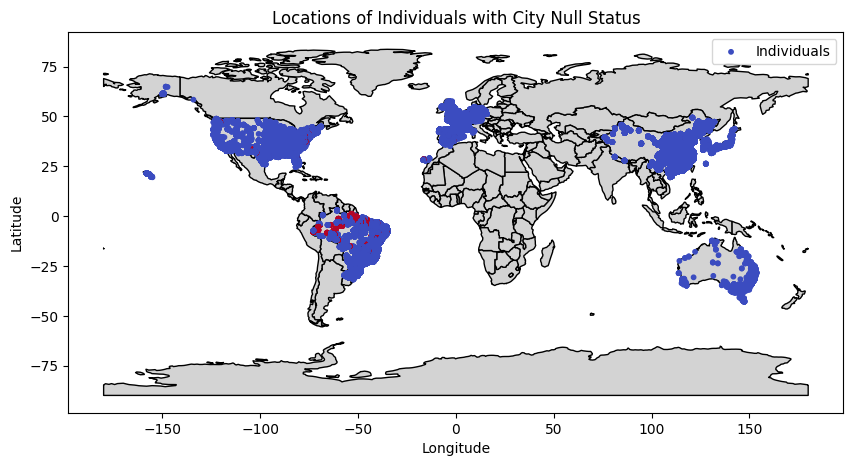

In [13]:
plot_users_on_map(users,'Locations of Individuals with City Null Status')

## Inference : Majority cities with null values are from south american continent.

In [14]:
import folium

# Create a map centered at a certain location
m = folium.Map(location=[37.0902, -95.7129], zoom_start=3)  # Centered at the United States

# Add markers for each distribution center
for index, row in dc.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], popup=row['name']).add_to(m)

# Save the map as an HTML file
# m.save("distribution_centers_map.html")
m

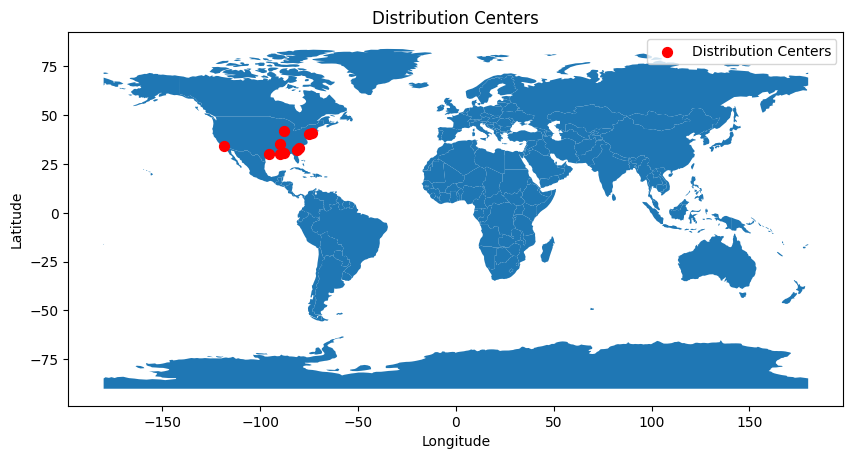

In [15]:
geometry = [Point(xy) for xy in zip(dc['longitude'], dc['latitude'])]
gdf = gpd.GeoDataFrame(dc, geometry=geometry)

# Plot the distribution centers
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(10, 6))
gdf.plot(ax=ax, color='red', markersize=50, label='Distribution Centers', marker='o')
ax.set_title('Distribution Centers')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()
plt.show()

## Based on the provided information in regarding distribution centers, it is apparent that the information pertains solely to distribution centers within the United States. Therefore, it would be more logical to focus our analysis on data pertaining to users from the United States.

### Filtering users from the US based on latitude and longitude

In [16]:
north_america_lat_bounds = (10, 70)   # Latitude range for North America
north_america_lon_bounds = (-180, -52)  # Longitude range for North America

# Filter users based on North American latitude and longitude boundaries
filtered_users = users[
    (users['latitude'] >= north_america_lat_bounds[0]) & 
    (users['latitude'] <= north_america_lat_bounds[1]) & 
    (users['longitude'] >= north_america_lon_bounds[0]) & 
    (users['longitude'] <= north_america_lon_bounds[1])
]

In [17]:
filtered_users.shape

(22522, 16)

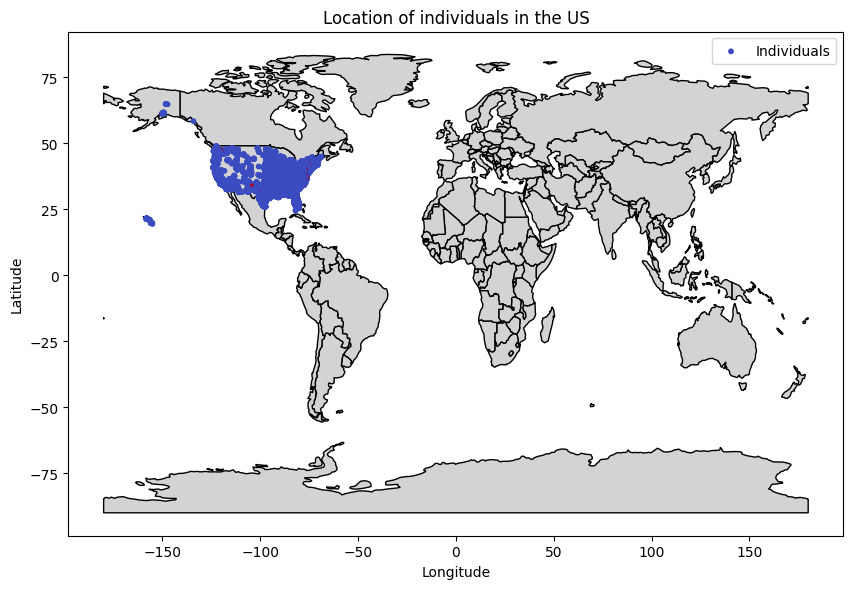

In [18]:
plot_users_on_map(filtered_users,"Location of individuals in the US")

# Taking just a small subset due to PC limitations
# The sample is a good representatin of population -  Checked

In [19]:
# Create a map centered at a certain location
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)  # Centered at the United States
temp = filtered_users.sample(200, replace=False)
# taking just a small subset due to PC limitations
# Add markers for each distribution center
for index, row in temp.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']]).add_to(m)

# Save the map as an HTML file
m

In [20]:
## Checking the null values in filtered data
filtered_users.isnull().sum() * 100 / filtered_users.shape[0]

id                0.000000
first_name        0.000000
last_name         0.000000
email             0.000000
age               0.000000
gender            0.000000
state             0.000000
street_address    0.000000
postal_code       0.000000
city              0.754818
country           0.000000
latitude          0.000000
longitude         0.000000
traffic_source    0.000000
created_at        0.000000
city_null         0.000000
dtype: float64

### City has a few null values, but this <span style="color:red">**DOES NOT**</span> even add up to 1% of the overall data hence I am imputing the city column with mode to make analysis simpler.

In [21]:
# imputing the null values with the mode
mode_city = filtered_users['city'].mode()[0]
filtered_users['city'].fillna(mode_city, inplace=True)

In [22]:
filtered_users.isnull().sum().sum()

0

## Calculating Density

In [23]:
# Create a map centered at a certain location
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)  # Centered at the United States
temp = filtered_users.sample(200, replace=False)
# taking just a small subset due to PC limitations
# Add markers for each distribution center
for index, row in temp.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']]).add_to(m)

# Save the map as an HTML file
for i,row in dc.iterrows():
    folium.Circle(
        location=[row['latitude'],row['longitude']],
        radius=300000, # in meters 300km
        popup="Salt Lake",
        color="blue",
        fill=True,
    ).add_to(m)
m

In [24]:
import pandas as pd
import numpy as np
from math import radians, sin, cos, sqrt, atan2

# Function to calculate distance between two points using Haversine formula
def calculate_distance(lat1, lon1, lat2, lon2):
    R = 6371.0  # approximate radius of Earth in km
    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)

    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

# Function to calculate density of users around each distribution center
def calculate_density(dc, users, radius_km):
    density_results = []

    for index, row in dc.iterrows():
        dc_id = row['id']
        dc_name = row['name']
        dc_lat = row['latitude']
        dc_lon = row['longitude']

        user_count = 0
        for _, user_row in users.iterrows():
            user_lat = user_row['latitude']
            user_lon = user_row['longitude']
            distance = calculate_distance(dc_lat, dc_lon, user_lat, user_lon)
            if distance <= radius_km:
                user_count += 1
        
        # Calculate density
        area = np.pi * (radius_km ** 2)
        density = user_count / area

        density_results.append({'id': dc_id, 'name': dc_name, 'density': density})

    return pd.DataFrame(density_results)
# https://www.movable-type.co.uk/scripts/latlong.html

In [25]:
# Calculate density of users around each distribution center
radius_km = 300
density_df_300 = calculate_density(dc, filtered_users, radius_km)

In [26]:
# distance = geodesic((dc_lat, dc_lon), (user_lat, user_lon)).kilometers
# takes more time

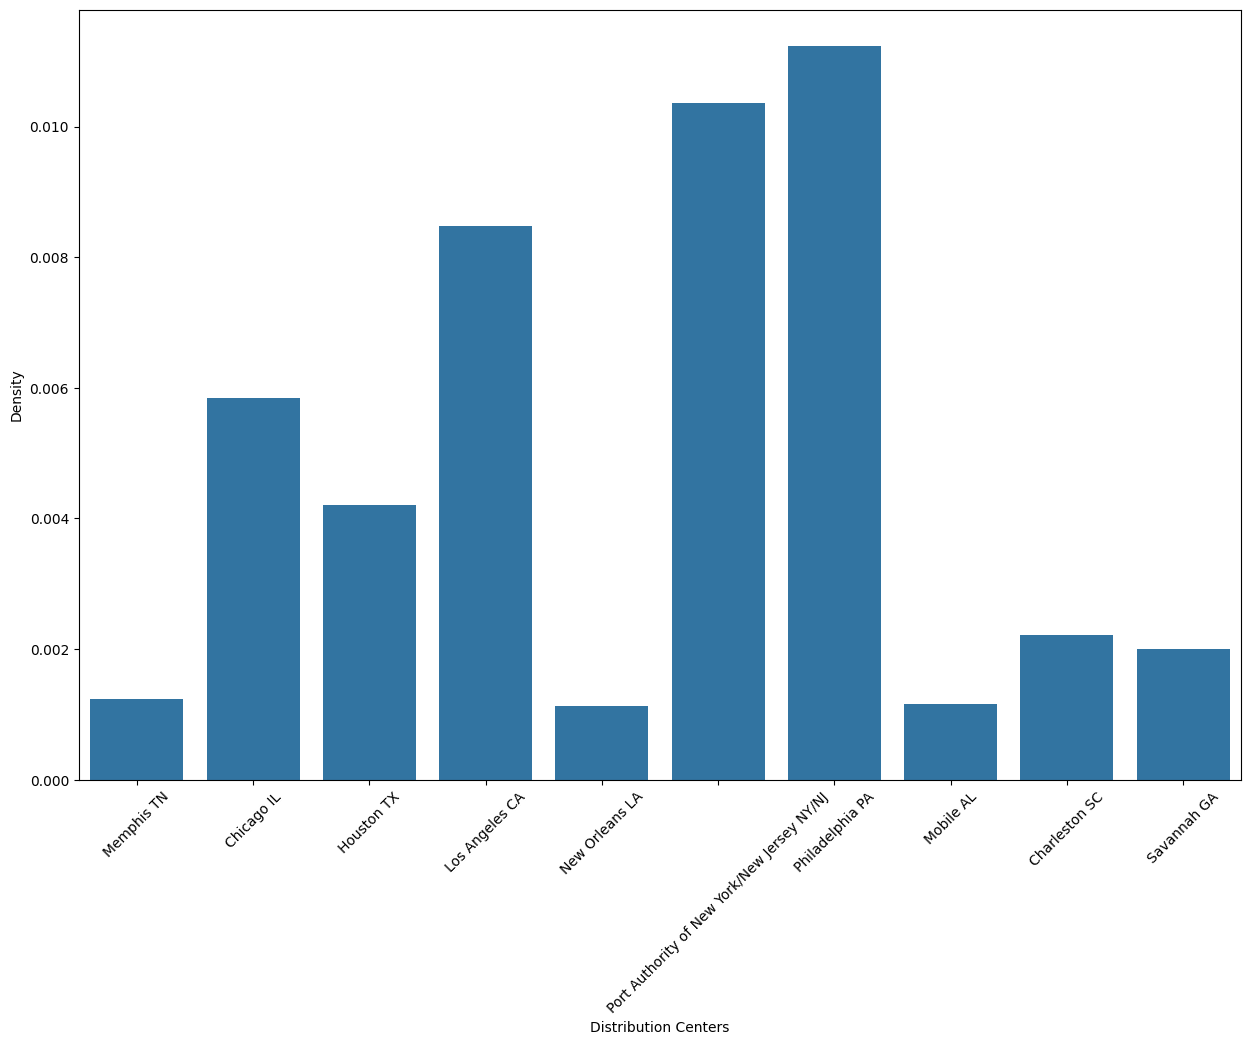

In [27]:
plt.figure(figsize=(15,10))
sns.barplot(x = density_df_300['name'],y = density_df_300['density'])
plt.xticks(rotation=45)
plt.xlabel('Distribution Centers') 
plt.ylabel('Density') 
plt.show()

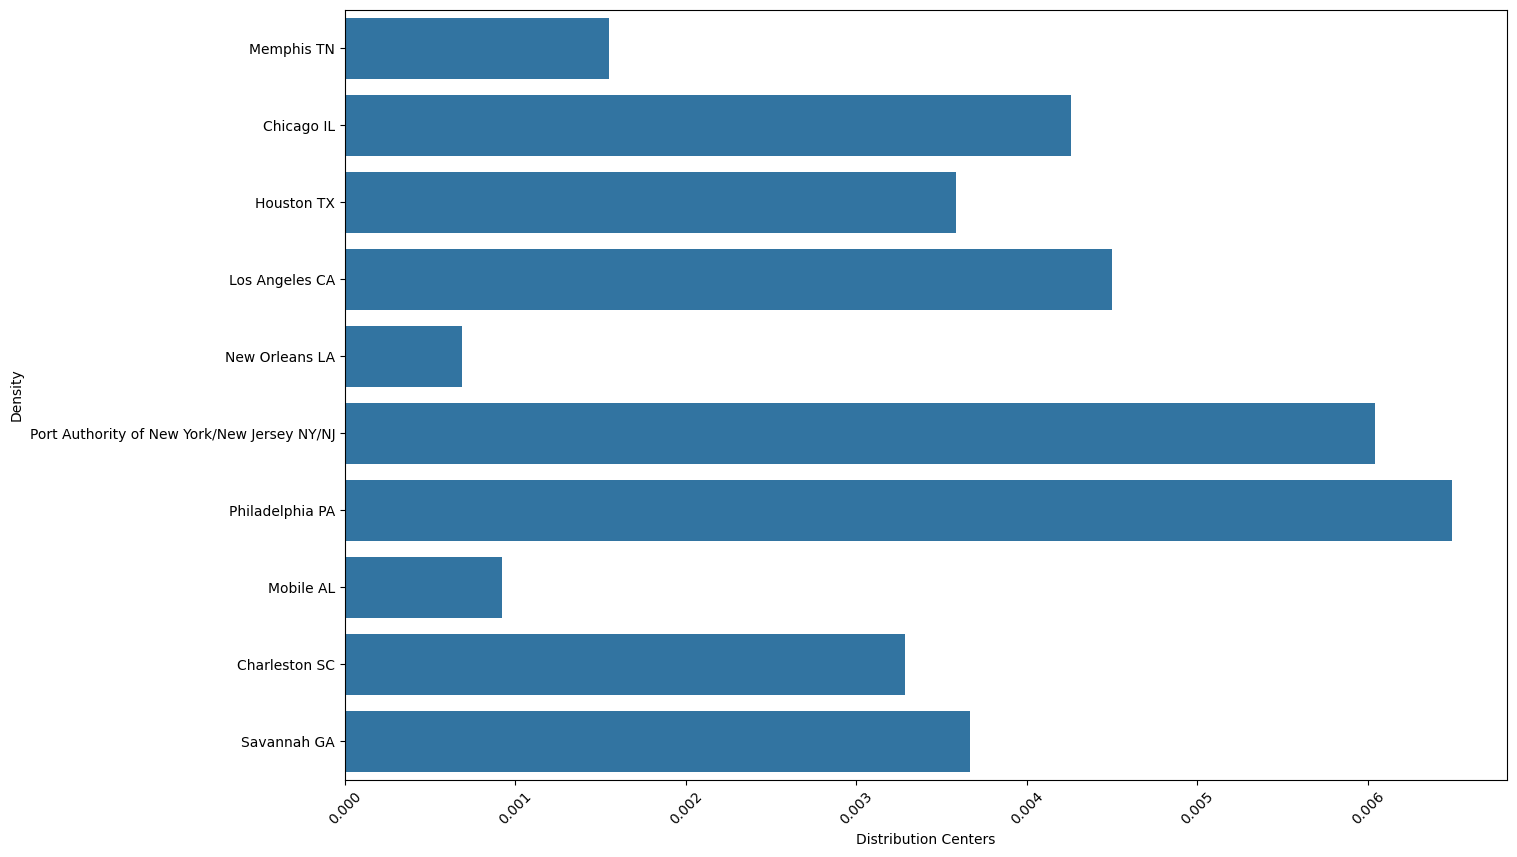

In [28]:
# Calculate density of users around each distribution center
radius_km = 450
density_df_450 = calculate_density(dc, filtered_users, radius_km)
plt.figure(figsize=(15,10))
sns.barplot(y = density_df_450['name'],x = density_df_450['density'])
plt.xticks(rotation=45)
plt.xlabel('Distribution Centers') 
plt.ylabel('Density') 
plt.show()

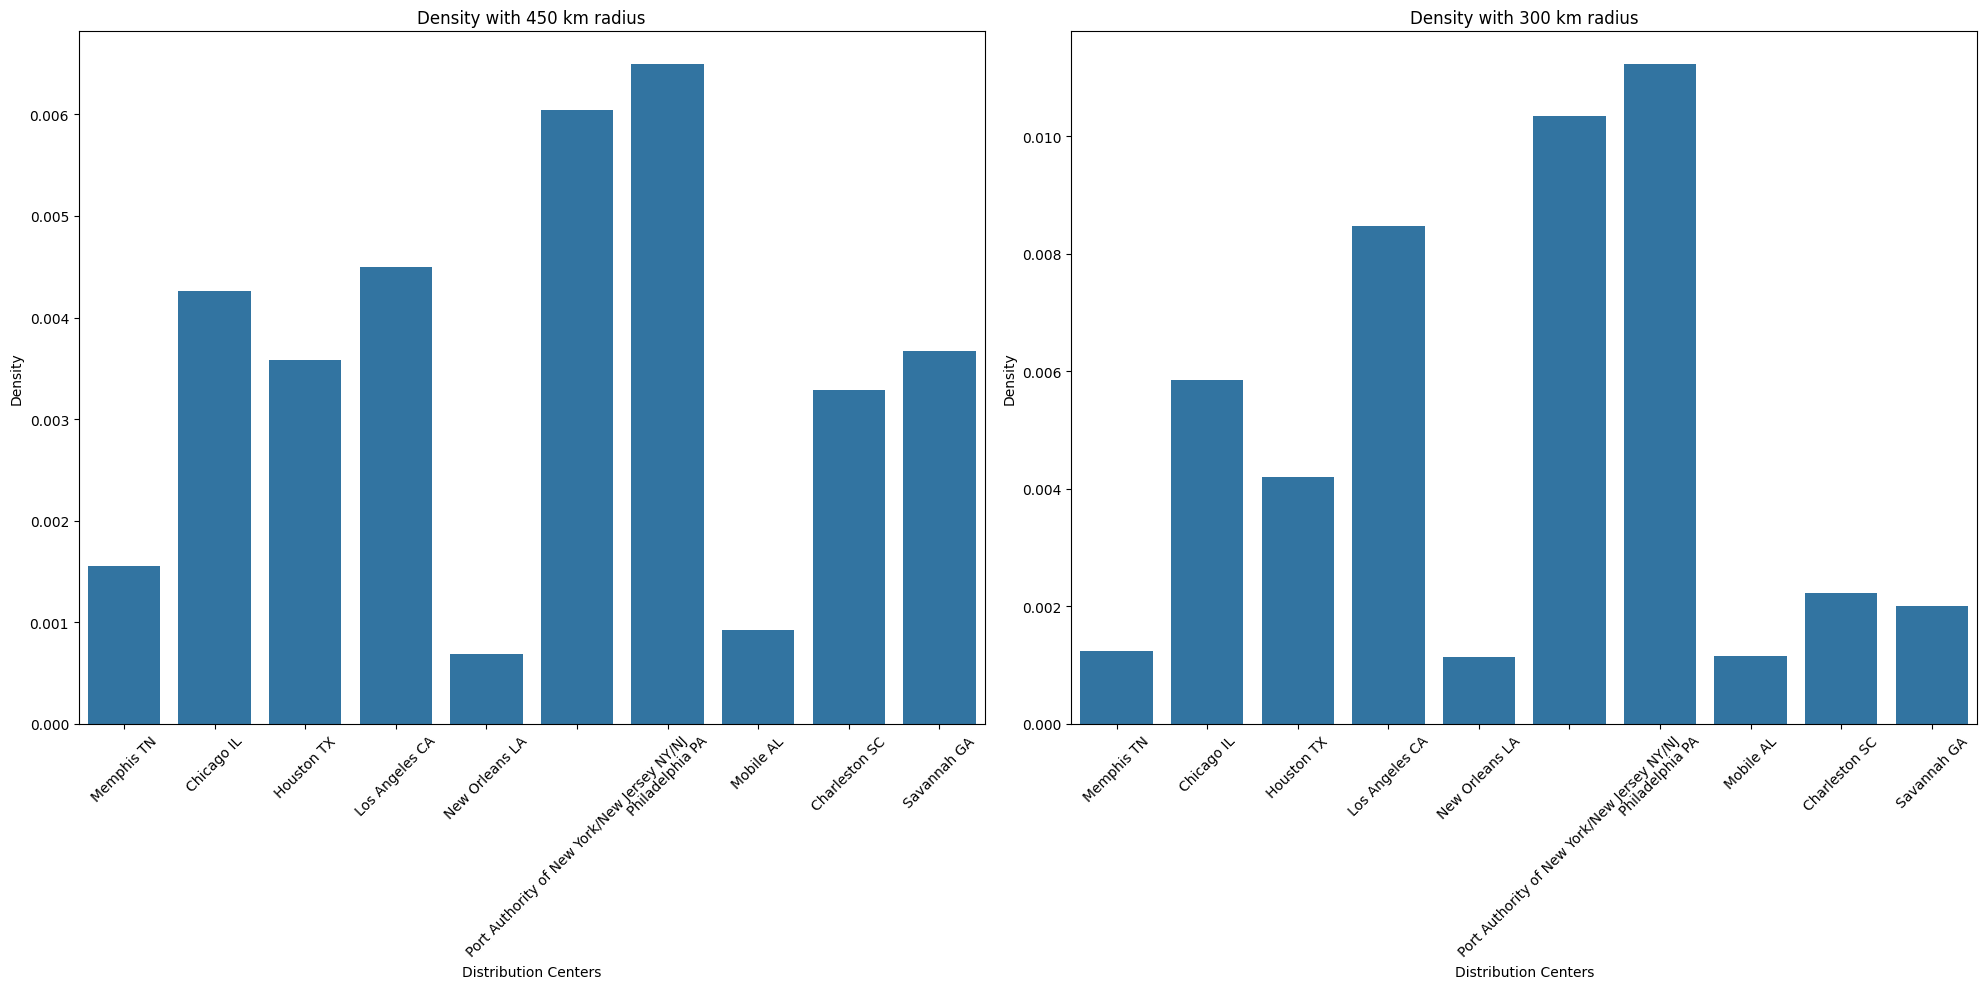

In [29]:
plt.figure(figsize=(20, 10))

# First subplot
plt.subplot(1, 2, 1)
sns.barplot(x=density_df_450['name'], y=density_df_450['density'])
plt.xticks(rotation=45)
plt.xlabel('Distribution Centers')
plt.ylabel('Density')
plt.title('Density with 450 km radius')

# Second subplot
plt.subplot(1, 2, 2)
sns.barplot(x=density_df_300['name'], y=density_df_300['density'])
plt.xticks(rotation=45)
plt.xlabel('Distribution Centers')
plt.ylabel('Density')
plt.title('Density with 300 km radius')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## "Port Authority of New York/New Jersey NY/NJ" and "Philadelphia PA" has the highest user density amonng all distribution centers

In [30]:
## In both case (300km and 450 km as radius, the result appear to be similar)

In [31]:
# Create a map centered at a certain location
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)  # Centered at the United States
temp = filtered_users.sample(200, replace=False)
# taking just a small subset due to PC limitations
# Cheaked that the sample is a good representatino of population
# Add markers for each distribution center
for index, row in temp.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']]).add_to(m)

# Save the map as an HTML file
for i,row in dc.iterrows():
    folium.Circle(
        location=[row['latitude'],row['longitude']],
        radius=450000, # in meters 300km
        popup="Salt Lake",
        color="blue",
        fill=True,
    ).add_to(m)
m

## The map clearly indicates that the distribution centers experience high population density in the Los Angeles area and across the eastern United States.
## Implying the need of more distribution centers in remaining parts (north western parts, hawaii)

# User Behaviour Analysis:
# Use events.csv to analyse user behaviour, including session patterns, traffic sources, and event types.

In [32]:
events = pd.read_csv('./data/events.csv')

In [33]:
events.shape

(2431963, 13)

In [34]:
events.head()

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
0,2198523,NaN,3,83889ed2-2adc-4b9a-af5d-154f6998e778,2021-06-17 17:30:00+00:00,138.143.9.202,São Paulo,São Paulo,02675-031,Chrome,Adwords,/cancel,cancel
1,1773216,NaN,3,7a3fc3f2-e84f-44fe-8876-eff76741f7a3,2020-08-07 08:41:00+00:00,85.114.141.79,Santa Isabel,São Paulo,07500-000,Safari,Adwords,/cancel,cancel
2,2380515,NaN,3,13d9b2fb-eee1-43fd-965c-267b38dd7125,2021-02-15 18:48:00+00:00,169.250.255.132,Mairiporã,São Paulo,07600-000,IE,Adwords,/cancel,cancel
3,2250597,NaN,3,96f1d44e-9621-463c-954c-d8deb7fffe7f,2022-03-30 10:56:00+00:00,137.25.222.160,Cajamar,São Paulo,07750-000,Chrome,Adwords,/cancel,cancel
4,1834446,NaN,3,d09dce10-a7cb-47d3-a9af-44975566fa03,2019-09-05 01:18:00+00:00,161.114.4.174,São Paulo,São Paulo,09581-680,Chrome,Email,/cancel,cancel


In [35]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2431963 entries, 0 to 2431962
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id               int64  
 1   user_id          float64
 2   sequence_number  int64  
 3   session_id       object 
 4   created_at       object 
 5   ip_address       object 
 6   city             object 
 7   state            object 
 8   postal_code      object 
 9   browser          object 
 10  traffic_source   object 
 11  uri              object 
 12  event_type       object 
dtypes: float64(1), int64(2), object(10)
memory usage: 241.2+ MB


## We have to convert created at column to datetime

In [36]:
events.isnull().sum() * 100/len(events)

id                  0.000000
user_id            46.286518
sequence_number     0.000000
session_id          0.000000
created_at          0.000000
ip_address          0.000000
city                0.949028
state               0.000000
postal_code         0.000000
browser             0.000000
traffic_source      0.000000
uri                 0.000000
event_type          0.000000
dtype: float64

## Since 46% of the `user_id` values are null, attempting to impute them would be futile; thus, it's more reasonable to drop these null values instead.

In [37]:
events.dropna(subset=['user_id'], inplace=True)

## Imputing the 'city' column with the mode is a simpler approach, considering the limitations posed by the large dataset and PC resources. While using a predictive model  or KNN imputer would be ideal, the computational demands make it impractical in this scenario. Therefore, opting for the mode for imputation provides a practical solution.

In [38]:
city_mode = events['city'].mode()[0]
events['city'].fillna(city_mode,inplace = True)

In [39]:
events['user_id'].nunique()

80044

In [40]:
events['city'].nunique()

7586

In [41]:
events['state'].nunique()

228

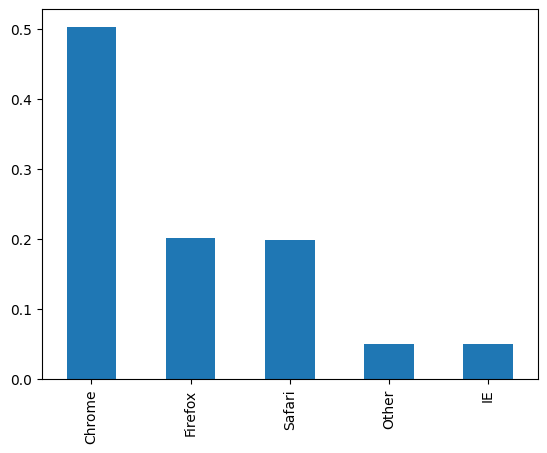

In [42]:
events['browser'].value_counts(normalize = True).plot(kind = 'bar')
plt.show()

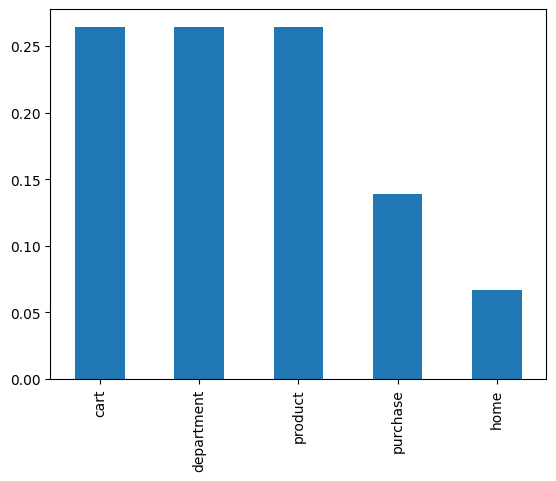

In [43]:
events['event_type'].value_counts(normalize = True).plot(kind = 'bar')
plt.show()

### Inference: The purchase percentage is relatively low, suggesting that many individuals are browsing products, adding them to their carts, but not completing the purchase.

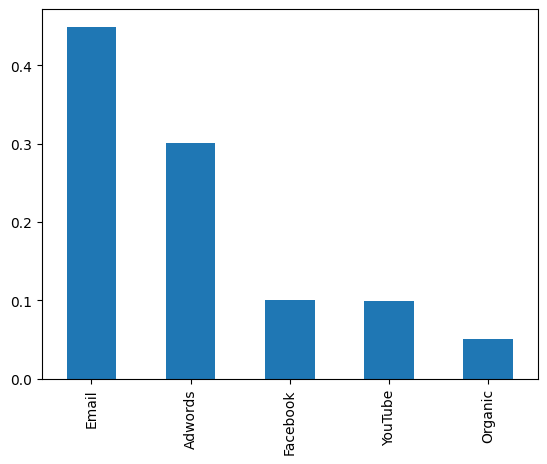

In [44]:
events['traffic_source'].value_counts(normalize = True).plot(kind = 'bar')
plt.show()

### High number of traffic is from emails and adwords

In [45]:
events['created_at'] = pd.to_datetime(events['created_at'])

# Analysing Session Duration of each session

In [46]:
session_duration = events.groupby('session_id')['created_at'].apply(lambda x: x.max() - x.min())

In [47]:
len(session_duration) == events.session_id.nunique()

True

In [48]:
session_duration = pd.DataFrame(session_duration).reset_index()

In [49]:
session_duration.rename(columns={'created_at': 'total_time'}, inplace=True)

In [50]:
session_duration['hours'] = session_duration['total_time'].apply(lambda x: x.total_seconds() / 3600)

In [51]:
session_duration.sort_values(by='total_time',ascending=False).head()

,session_id,total_time,hours
181589,ffb9f231-7c92-44bf-a4a6-72e6e3e99e61,4 days 00:28:43,96.478611
97348,8923b9b6-99a7-42d6-862c-bff0c5261e94,4 days 00:28:04,96.467778
146175,cdf858b0-75c8-4910-b84f-1e3bd1b3b607,4 days 00:27:39,96.460833
29022,28e0bfc8-175b-40ad-b8b9-4dc16e7bc90a,4 days 00:27:26,96.457222
92967,82f6d3d2-d7ce-4cd2-811b-8f886ded2451,4 days 00:27:14,96.453889


In [52]:
session_duration.describe()

,total_time,hours
count,181759,181759.000000
mean,1 days 01:00:36.925219658,25.010257
std,1 days 10:14:32.129534889,34.242258
min,0 days 00:00:16,0.004444
25%,0 days 00:06:00,0.100000
50%,0 days 00:09:14,0.153889
75%,2 days 00:12:32,48.208889
max,4 days 00:28:43,96.478611


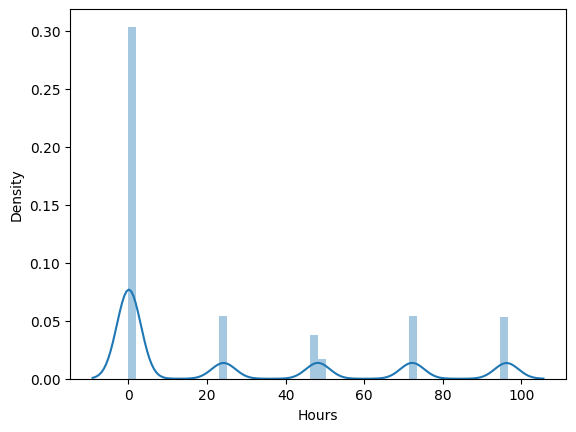

In [53]:
sns.distplot(session_duration['hours'])
plt.xlabel('Hours')
plt.ylabel('Density')
plt.show()

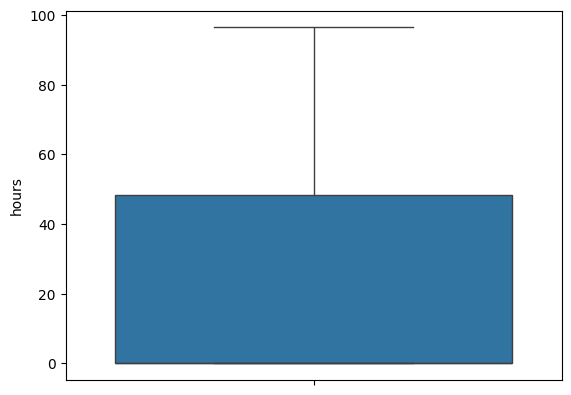

In [54]:
sns.boxplot(session_duration['hours'])
plt.show()

In [55]:
len(session_duration[session_duration['hours'] < 25 ]) * 100/ len(session_duration)

68.89067391435913

## Inference : Approximately 70% of whole sessions are only less than 25 hours

In [56]:
len(session_duration[session_duration['hours'] < 0.5]) * 100/ len(session_duration)

58.54015482039404

## Inference : Approximately 60% of whole sessions are only less than 0.5 hours

In [57]:
len(session_duration[session_duration['hours'] > 80]) * 100/ len(session_duration)

10.303203692802008

## Inference: Approximately 10% of whole sessions are only more than 10 hours

In [58]:
## Session duration have a hightly right skewness
session_duration['hours'].skew()

1.0055929400746904

In [59]:
session_duration['hours'].kurtosis()

-0.5142478528012613

# Analysing session frequency

In [60]:
session_frequency = events.groupby('user_id')['session_id'].nunique()

In [61]:
session_frequency = pd.DataFrame(session_frequency).reset_index()

In [62]:
session_frequency.rename(columns={'session_id': 'frequency'}, inplace=True)

In [63]:
session_frequency.head(3)

,user_id,frequency
0,1.0,3
1,2.0,1
2,3.0,5


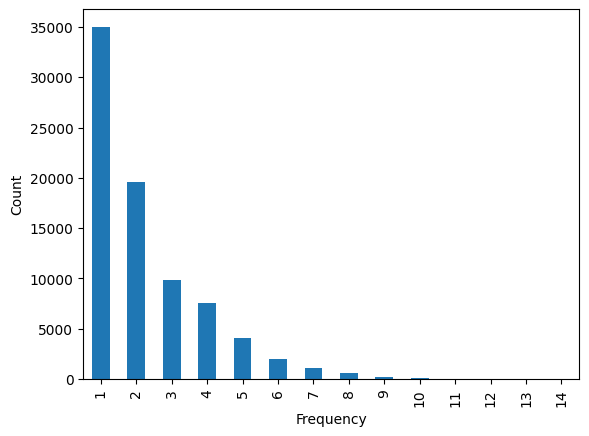

In [64]:
session_frequency['frequency'].value_counts().plot(kind = 'bar')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

### The inference from a high number of users having a session frequency of 1 is that a significant portion of users visit the platform or website only once. This suggests a low level of engagement or interaction beyond the initial visit.

#### Lack of Retention Strategies
#### User Experience Issues
#### Users may have visited the platform to make a one-time transaction

# Sales and Revenue Analysis: Leverage order_items.csv and inventory_items.csv to analyse product sales, revenue, and profitability

In [65]:
order_items = pd.read_csv('./data/order_items.csv')
inventory_items = pd.read_csv('./data/inventory_items.csv')

In [66]:
print(order_items.shape)
print(inventory_items.shape)

(181759, 11)
(490705, 12)


In [67]:
order_items.head()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaN,NaN,NaN,0.02
1,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21+00:00,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,NaN,0.02
2,51224,35223,28215,14235,138236,Complete,2023-12-05 13:25:30+00:00,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,NaN,0.02
3,36717,25278,20165,14235,99072,Shipped,2023-12-22 20:48:19+00:00,2023-12-24 16:44:00+00:00,NaN,NaN,0.02
4,131061,90241,71954,14235,353798,Shipped,2022-06-19 16:57:59+00:00,2022-06-19 19:29:00+00:00,NaN,NaN,0.02


In [68]:
inventory_items.head()

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,67971,13844,2022-07-02 07:09:20+00:00,2022-07-24 06:33:20+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
1,67972,13844,2023-12-20 03:28:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
2,67973,13844,2023-06-04 02:53:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
3,72863,13844,2021-10-16 22:58:52+00:00,2021-11-22 02:19:52+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
4,72864,13844,2021-08-07 16:33:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7


In [69]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181759 entries, 0 to 181758
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 181759 non-null  int64  
 1   order_id           181759 non-null  int64  
 2   user_id            181759 non-null  int64  
 3   product_id         181759 non-null  int64  
 4   inventory_item_id  181759 non-null  int64  
 5   status             181759 non-null  object 
 6   created_at         181759 non-null  object 
 7   shipped_at         118281 non-null  object 
 8   delivered_at       63841 non-null   object 
 9   returned_at        18232 non-null   object 
 10  sale_price         181759 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 15.3+ MB


In [70]:
inventory_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490705 entries, 0 to 490704
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              490705 non-null  int64  
 1   product_id                      490705 non-null  int64  
 2   created_at                      490705 non-null  object 
 3   sold_at                         181759 non-null  object 
 4   cost                            490705 non-null  float64
 5   product_category                490705 non-null  object 
 6   product_name                    490676 non-null  object 
 7   product_brand                   490304 non-null  object 
 8   product_retail_price            490705 non-null  float64
 9   product_department              490705 non-null  object 
 10  product_sku                     490705 non-null  object 
 11  product_distribution_center_id  490705 non-null  int64  
dtypes: float64(2), i

In [71]:
order_items.isnull().sum() * 100 / len(order_items)

id                    0.000000
order_id              0.000000
user_id               0.000000
product_id            0.000000
inventory_item_id     0.000000
status                0.000000
created_at            0.000000
shipped_at           34.924268
delivered_at         64.876017
returned_at          89.969135
sale_price            0.000000
dtype: float64

In [72]:
inventory_items.isnull().sum() * 100 / len(inventory_items)

id                                 0.000000
product_id                         0.000000
created_at                         0.000000
sold_at                           62.959619
cost                               0.000000
product_category                   0.000000
product_name                       0.005910
product_brand                      0.081719
product_retail_price               0.000000
product_department                 0.000000
product_sku                        0.000000
product_distribution_center_id     0.000000
dtype: float64

## Analysing the order_items data

In [73]:
order_items.describe()

,id,order_id,user_id,product_id,inventory_item_id,sale_price
count,181759.000000,181759.000000,181759.000000,181759.000000,181759.000000,181759.000000
mean,90880.000000,62579.982609,49983.272020,15254.151838,245291.860007,59.568544
std,52469.448126,36125.987285,28830.895739,8413.482833,141661.912894,66.657262
min,1.000000,1.000000,1.000000,1.000000,3.000000,0.020000
25%,45440.500000,31266.500000,25031.500000,7979.500000,122565.000000,24.500000
50%,90880.000000,62529.000000,49983.000000,15966.000000,245284.000000,39.990002
75%,136319.500000,93845.500000,74867.500000,22504.000000,367983.000000,69.949997
max,181759.000000,125226.000000,100000.000000,29120.000000,490705.000000,999.000000


In [74]:
order_items.head()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaN,NaN,NaN,0.02
1,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21+00:00,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,NaN,0.02
2,51224,35223,28215,14235,138236,Complete,2023-12-05 13:25:30+00:00,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,NaN,0.02
3,36717,25278,20165,14235,99072,Shipped,2023-12-22 20:48:19+00:00,2023-12-24 16:44:00+00:00,NaN,NaN,0.02
4,131061,90241,71954,14235,353798,Shipped,2022-06-19 16:57:59+00:00,2022-06-19 19:29:00+00:00,NaN,NaN,0.02


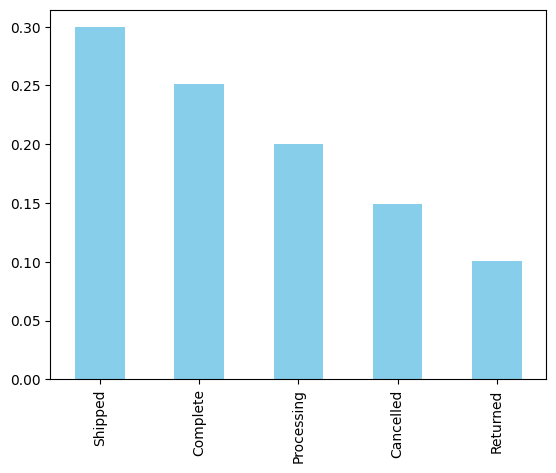

In [75]:
order_items['status'].value_counts(normalize = True).plot(kind = 'bar',color='skyblue')
plt.show()

In [76]:
order_items['status'].value_counts(normalize = True)

Shipped       0.299517
Complete      0.250931
Processing    0.200199
Cancelled     0.149044
Returned      0.100309
Name: status, dtype: float64

## 55% of orders are either shipped or completed and 10% returned.10% return rate suggests a noteworthy proportion of orders experiencing dissatisfaction or issues significant enough for customers to initiate returns.

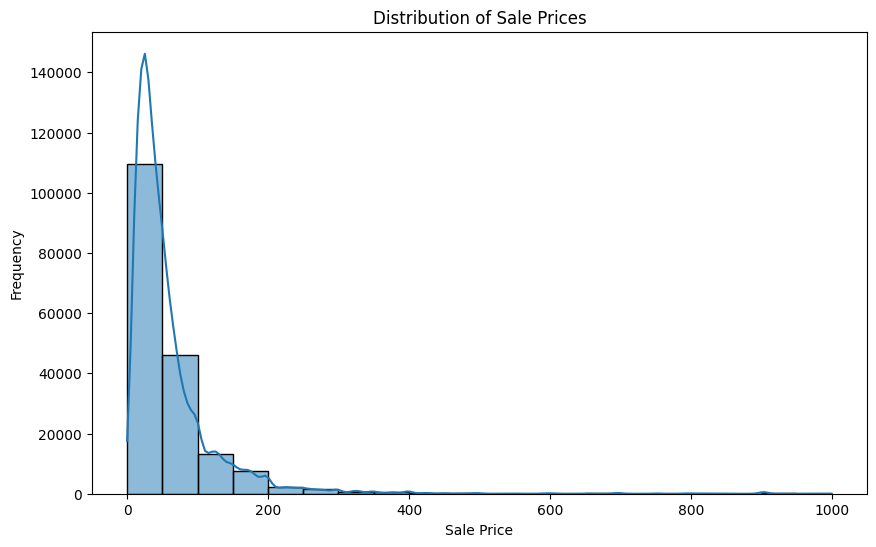

In [77]:
plt.figure(figsize=(10, 6))
sns.histplot(data=order_items, x='sale_price', bins=20, kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

## Inference : Very high proportion of data is priced less than 200, this may suggest a market segment or consumer preference for budget-friendly products within the business's product range.

In [78]:
order_items['created_at'] = pd.to_datetime(order_items['created_at'])

# Create a new column 'day_of_week' using a lambda function
order_items['day_of_week'] = order_items['created_at'].apply(lambda x: x.strftime('%A'))
order_items['month_created'] = order_items['created_at'].apply(lambda x: x.month)


In [79]:
order_items['day_of_week'].value_counts(normalize=True)

Monday       0.146023
Sunday       0.143916
Wednesday    0.142755
Tuesday      0.142507
Thursday     0.142447
Saturday     0.141715
Friday       0.140637
Name: day_of_week, dtype: float64

### Orders date do note seem to be much dependent on the day of the week

In [80]:
order_items.product_id.nunique()

29046

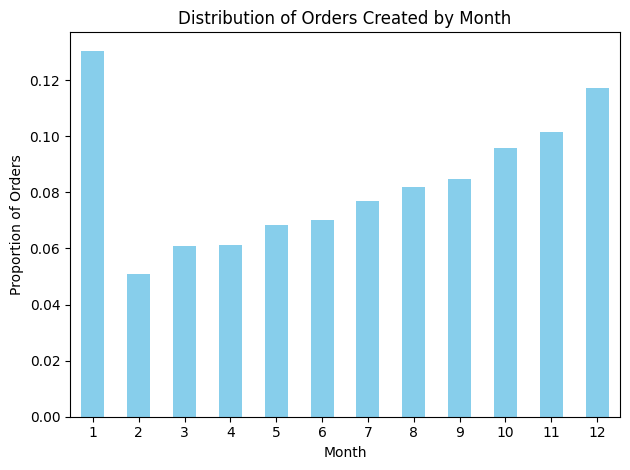

In [81]:
order_items['month_created'].value_counts(normalize=True).sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Orders Created by Month')
plt.xlabel('Month')
plt.ylabel('Proportion of Orders')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

## Inference: Highest number of order are Placed in the winter seasons (nov-jan)

In [82]:
order_items.head()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,day_of_week,month_created
0,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaN,NaN,NaN,0.02,Sunday,5
1,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21+00:00,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,NaN,0.02,Tuesday,3
2,51224,35223,28215,14235,138236,Complete,2023-12-05 13:25:30+00:00,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,NaN,0.02,Tuesday,12
3,36717,25278,20165,14235,99072,Shipped,2023-12-22 20:48:19+00:00,2023-12-24 16:44:00+00:00,NaN,NaN,0.02,Friday,12
4,131061,90241,71954,14235,353798,Shipped,2022-06-19 16:57:59+00:00,2022-06-19 19:29:00+00:00,NaN,NaN,0.02,Sunday,6


In [83]:
order_items.status.unique()

array(['Cancelled', 'Complete', 'Shipped', 'Processing', 'Returned'],
      dtype=object)

In [84]:
inventory_items.head()

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,67971,13844,2022-07-02 07:09:20+00:00,2022-07-24 06:33:20+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
1,67972,13844,2023-12-20 03:28:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
2,67973,13844,2023-06-04 02:53:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
3,72863,13844,2021-10-16 22:58:52+00:00,2021-11-22 02:19:52+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
4,72864,13844,2021-08-07 16:33:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7


### Merging  order  dataset on the basis of product_id  with inventory and joining only [product_category,product_name,product_brand,product_retail_price,product_department] columns

In [85]:
merged_df = pd.merge(order_items, inventory_items[['product_id', 'product_category', 'product_name', 'product_brand', 'product_retail_price', 'product_department','cost']],right_on='product_id' ,left_on='product_id', how='left')
merged_df.head(3)

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,day_of_week,month_created,product_category,product_name,product_brand,product_retail_price,product_department,cost
0,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaN,NaN,NaN,0.02,Sunday,5,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,0.0083
1,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaN,NaN,NaN,0.02,Sunday,5,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,0.0083
2,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaN,NaN,NaN,0.02,Sunday,5,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,0.0083


In [86]:
merged_df.status.unique()

array(['Cancelled', 'Complete', 'Shipped', 'Processing', 'Returned'],
      dtype=object)

In [87]:
merged_df.isnull().sum() * 100 / len(merged_df)

id                       0.000000
order_id                 0.000000
user_id                  0.000000
product_id               0.000000
inventory_item_id        0.000000
status                   0.000000
created_at               0.000000
shipped_at              34.829065
delivered_at            64.777262
returned_at             89.904416
sale_price               0.000000
day_of_week              0.000000
month_created            0.000000
product_category         0.000000
product_name             0.004040
product_brand            0.077631
product_retail_price     0.000000
product_department       0.000000
cost                     0.000000
dtype: float64

In [88]:
merged_df.shape
# (3588767, 19)

(3588767, 19)

In [89]:
order_items.shape,inventory_items.shape

((181759, 13), (490705, 12))

In [90]:
merged_df.drop(['shipped_at','delivered_at','returned_at'],axis = 1,inplace = True)
merged_df.dropna(subset=['product_brand'],inplace = True)  # negligible number if rows

In [91]:
merged_df.shape

(3585981, 16)

In [92]:
merged_df['product_category'].nunique()

26

In [93]:
merged_df['product_name'].nunique()

27215

In [94]:
merged_df['product_brand'].nunique()

2752

In [95]:
merged_df['product_department'].value_counts(normalize=True)

Men      0.541566
Women    0.458434
Name: product_department, dtype: float64

In [96]:
merged_df['product_id'].nunique()

29022

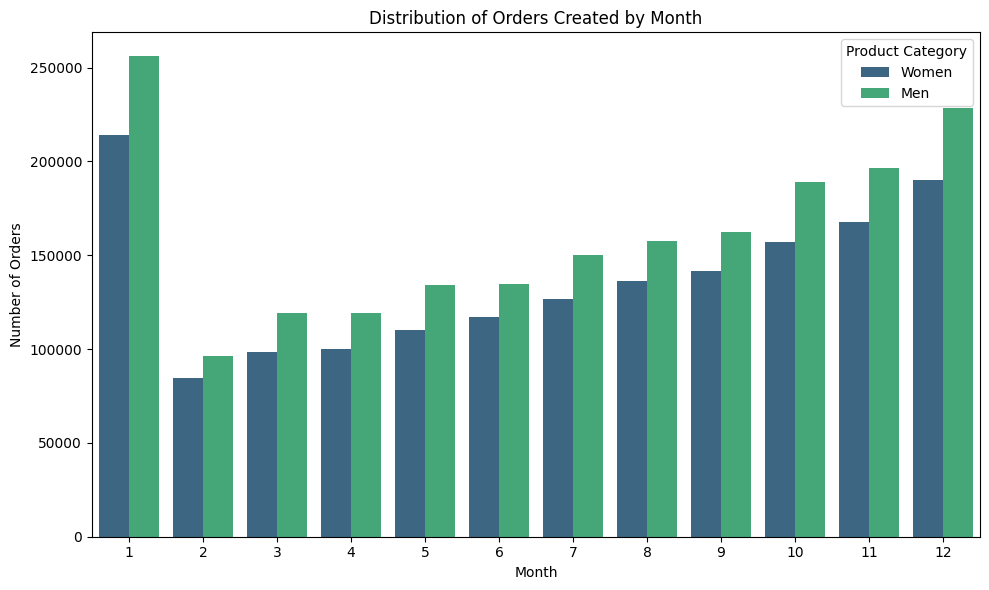

In [97]:
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='month_created', hue='product_department', palette='viridis')
plt.title('Distribution of Orders Created by Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()

## In all months, product_department - men have higher number of purchase.

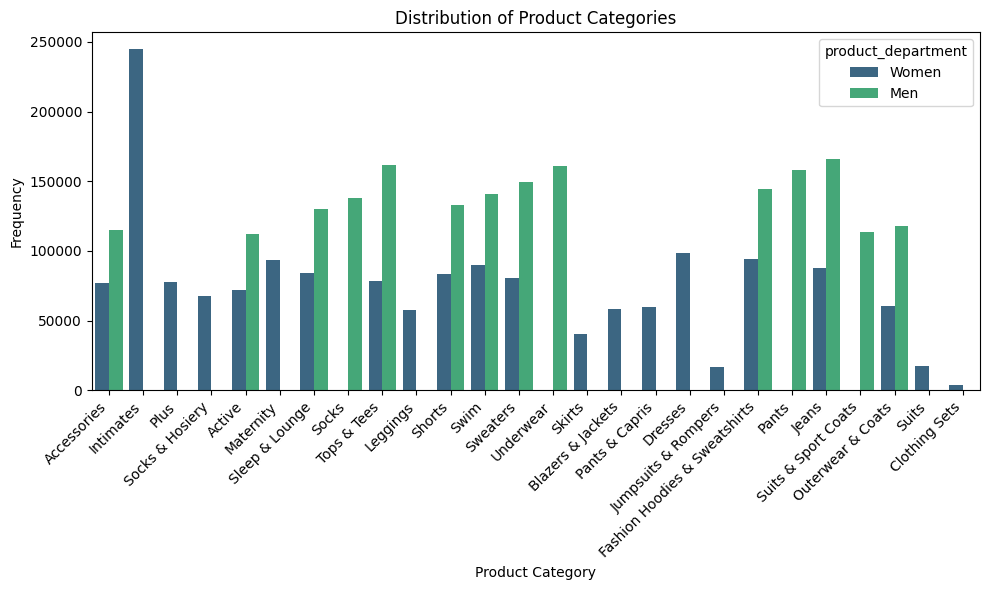

In [98]:
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='product_category', hue='product_department', palette='viridis')
plt.title('Distribution of Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## There is a notable number of products that are exclusive for women

In [99]:
merged_df['profit'] = merged_df['sale_price'] - merged_df['cost']

In [100]:
total_revenue = merged_df['profit'].sum()
total_revenue

111559298.7420401

## Total Revenue made from all the orders is 111559298.7420401

In [101]:
merged_df.head(1)

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,sale_price,day_of_week,month_created,product_category,product_name,product_brand,product_retail_price,product_department,cost,profit
0,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,0.02,Sunday,5,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,0.0083,0.0117


In [102]:
average_revenue_per_order = merged_df['profit'].mean()
average_revenue_per_order

31.109841000841918

In [103]:
inventory_items

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,67971,13844,2022-07-02 07:09:20+00:00,2022-07-24 06:33:20+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
1,67972,13844,2023-12-20 03:28:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
2,67973,13844,2023-06-04 02:53:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
3,72863,13844,2021-10-16 22:58:52+00:00,2021-11-22 02:19:52+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
4,72864,13844,2021-08-07 16:33:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
...,...,...,...,...,...,...,...,...,...,...,...,...
490700,311018,25590,2021-12-07 12:47:00+00:00,NaN,10.39200,Underwear,ck one Men's Micro Slim Fit Boxer,Calvin Klein,24.00,Men,F220707C3AFE39D1779E0A34AF72BB7F,3
490701,451084,25590,2023-10-10 11:57:57+00:00,2023-11-27 11:28:57+00:00,10.39200,Underwear,ck one Men's Micro Slim Fit Boxer,Calvin Klein,24.00,Men,F220707C3AFE39D1779E0A34AF72BB7F,3
490702,451085,25590,2020-11-20 05:55:00+00:00,NaN,10.39200,Underwear,ck one Men's Micro Slim Fit Boxer,Calvin Klein,24.00,Men,F220707C3AFE39D1779E0A34AF72BB7F,3
490703,486057,25590,2023-02-26 22:35:12+00:00,2023-04-23 01:24:12+00:00,10.39200,Underwear,ck one Men's Micro Slim Fit Boxer,Calvin Klein,24.00,Men,F220707C3AFE39D1779E0A34AF72BB7F,3


In [104]:
merged_df[merged_df['sale_price']!=merged_df['product_retail_price']]

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,sale_price,day_of_week,month_created,product_category,product_name,product_brand,product_retail_price,product_department,cost,profit


## Average revenue per sale 31.109841000841918

In [105]:
merged_df.groupby('month_created')['profit'].mean()

month_created
1     31.522479
2     31.037516
3     30.812681
4     30.565636
5     30.452244
6     30.626332
7     31.320669
8     31.019630
9     31.562169
10    31.516196
11    30.900557
12    31.232774
Name: profit, dtype: float64

## Considering only the orders which are having completed status as this would give is better understanding of the profit

In [106]:
completed_orders = merged_df[merged_df['status'] == 'Complete']

In [107]:
total_revenue = completed_orders['profit'].sum()
total_revenue

27951667.062018547

In [108]:
average_revenue_per_order = completed_orders['profit'].mean()
average_revenue_per_order

31.025864884055153

In [109]:
merged_df.isnull().sum()

id                        0
order_id                  0
user_id                   0
product_id                0
inventory_item_id         0
status                    0
created_at                0
sale_price                0
day_of_week               0
month_created             0
product_category          0
product_name            145
product_brand             0
product_retail_price      0
product_department        0
cost                      0
profit                    0
dtype: int64

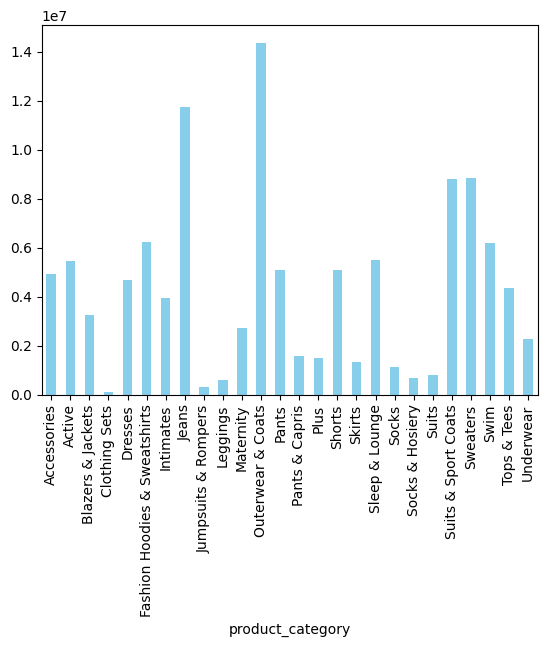

In [110]:
merged_df.groupby('product_category')['profit'].sum().plot(kind = 'bar',color='skyblue')
plt.show()

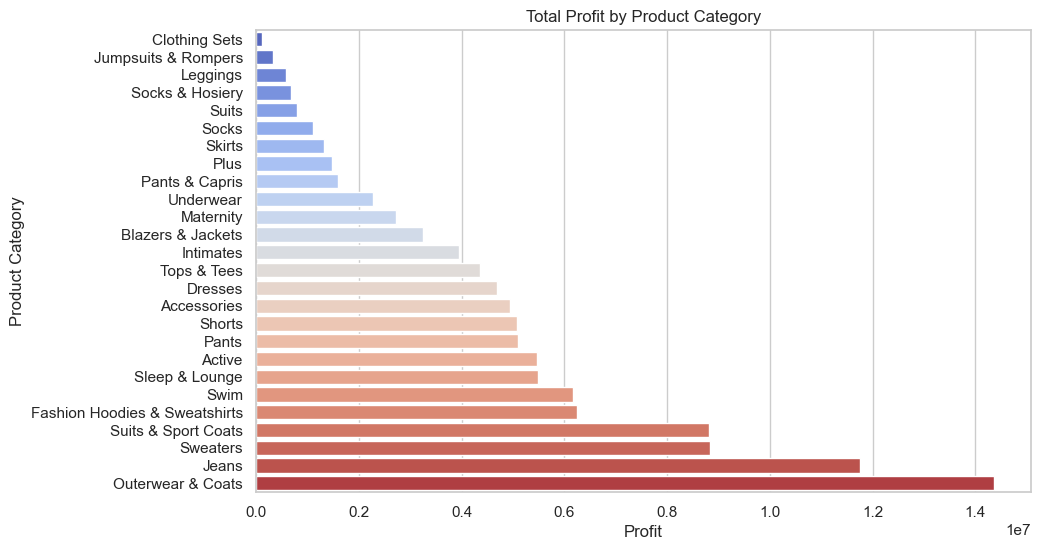

In [111]:
profit_by_category = merged_df.groupby('product_category')['profit'].sum().reset_index().sort_values(by = 'profit')
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='profit', y='product_category', data=profit_by_category, palette='coolwarm')
plt.title('Total Profit by Product Category')
plt.xlabel('Profit')
plt.ylabel('Product Category')
plt.show()

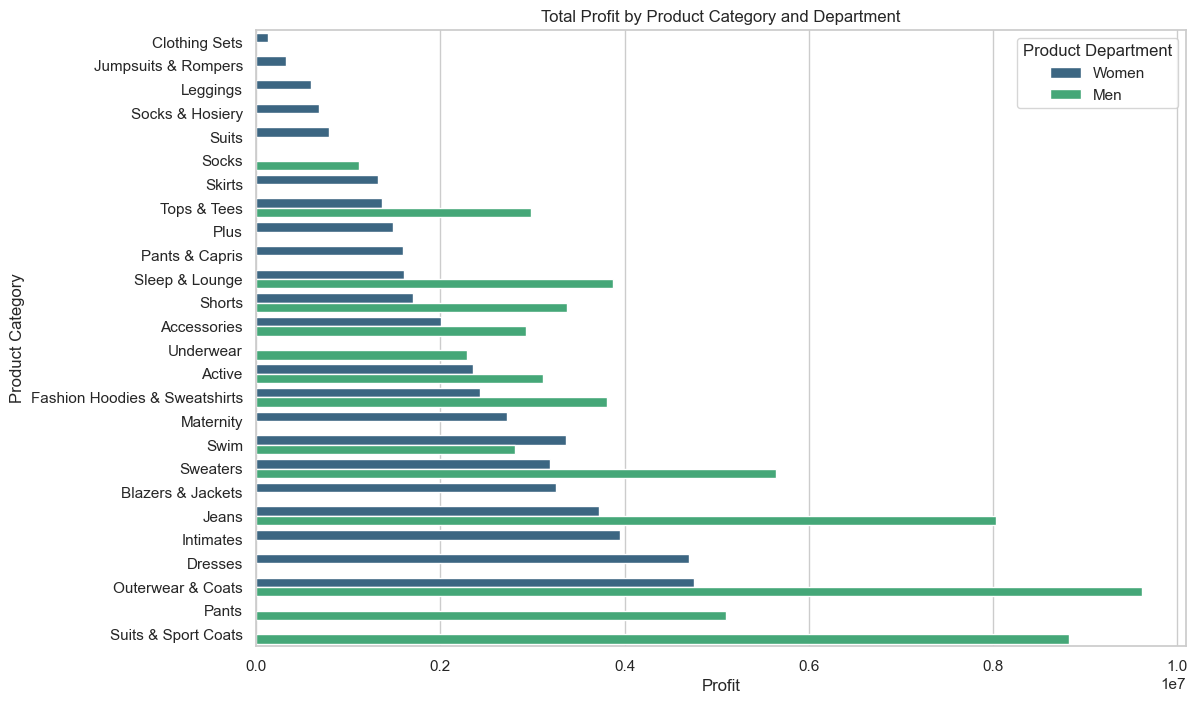

In [112]:
profit_by_category_dept = merged_df.groupby(['product_category','product_department'])['profit'].sum().reset_index().sort_values(by = 'profit')
plt.figure(figsize=(12, 8))
sns.barplot(x='profit', y='product_category', hue='product_department', data=profit_by_category_dept, palette='viridis')
plt.title('Total Profit by Product Category and Department')
plt.xlabel('Profit')
plt.ylabel('Product Category')
plt.legend(title='Product Department')
plt.show()

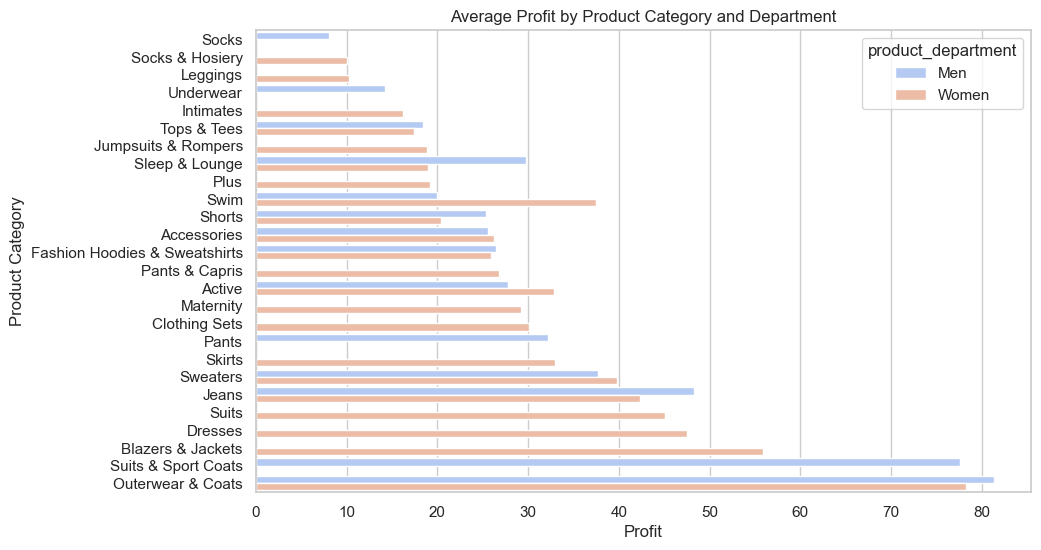

In [113]:
profit_mean_by_category = merged_df.groupby(['product_category','product_department'])['profit'].mean().reset_index().sort_values(by = 'profit')
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='profit', y='product_category',hue = 'product_department', data=profit_mean_by_category, palette='coolwarm')
plt.title('Average Profit by Product Category and Department')
plt.xlabel('Profit')
plt.ylabel('Product Category')
plt.show()

In [114]:
# merged_df_inventory = pd.merge(inventory_items, order_items,left_on='id', right_on='inventory_item_id', how='inner')
# merged_df_inventory.head()

### Inference : Outerwear and Coats have the highest profit margin and Clothing sets,Jumpsuits and rompers have the lowest

## Volume of product orderedin each category

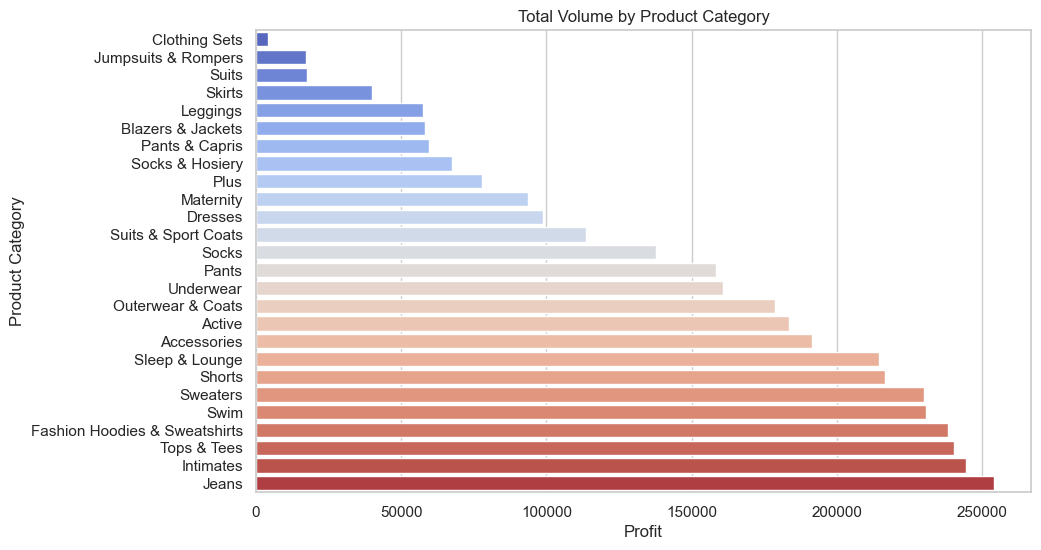

In [115]:
profit_by_category = merged_df.groupby('product_category')['profit'].count().reset_index().sort_values(by = 'profit')
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='profit', y='product_category', data=profit_by_category, palette='coolwarm')
plt.title('Total Volume by Product Category')
plt.xlabel('Profit')
plt.ylabel('Product Category')
plt.show()

# Product Performance Analysis: Explore products.csv to analyse product performance, including costs, categories, and popularity.

In [116]:
product = pd.read_csv('./data/products.csv')
product.head()

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
0,13842,2.51875,Accessories,Low Profile Dyed Cotton Twill Cap - Navy W39S55D,MG,6.25,Women,EBD58B8A3F1D72F4206201DA62FB1204,1
1,13928,2.33835,Accessories,Low Profile Dyed Cotton Twill Cap - Putty W39S55D,MG,5.95,Women,2EAC42424D12436BDD6A5B8A88480CC3,1
2,14115,4.87956,Accessories,Enzyme Regular Solid Army Caps-Black W35S45D,MG,10.99,Women,EE364229B2791D1EF9355708EFF0BA34,1
3,14157,4.64877,Accessories,Enzyme Regular Solid Army Caps-Olive W35S45D (...,MG,10.99,Women,00BD13095D06C20B11A2993CA419D16B,1
4,14273,6.50793,Accessories,Washed Canvas Ivy Cap - Black W11S64C,MG,15.99,Women,F531DC20FDE20B7ADF3A73F52B71D0AF,1


In [117]:
product.shape

(29120, 9)

In [118]:
product.describe()

,id,cost,retail_price,distribution_center_id
count,29120.000000,29120.000000,29120.000000,29120.000000
mean,14560.500000,28.481774,59.220164,4.982898
std,8406.364256,30.624681,65.888927,2.901153
min,1.000000,0.008300,0.020000,1.000000
25%,7280.750000,11.275613,24.000000,2.000000
50%,14560.500000,19.675081,39.990002,5.000000
75%,21840.250000,34.440000,69.949997,8.000000
max,29120.000000,557.151002,999.000000,10.000000


In [119]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29120 entries, 0 to 29119
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      29120 non-null  int64  
 1   cost                    29120 non-null  float64
 2   category                29120 non-null  object 
 3   name                    29118 non-null  object 
 4   brand                   29096 non-null  object 
 5   retail_price            29120 non-null  float64
 6   department              29120 non-null  object 
 7   sku                     29120 non-null  object 
 8   distribution_center_id  29120 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [120]:
product.isnull().sum() * 100/len(product)

id                        0.000000
cost                      0.000000
category                  0.000000
name                      0.006868
brand                     0.082418
retail_price              0.000000
department                0.000000
sku                       0.000000
distribution_center_id    0.000000
dtype: float64

In [121]:
## Since the null value perccentage is negligible , imputing it with mode
brand_mode = product['brand'].mode()[0]
product['brand'].fillna(brand_mode,inplace = True)

In [122]:
## Dropping rows with namecolumn with null values
product.dropna(subset=['name'],inplace = True)

In [123]:
product.head()

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
0,13842,2.51875,Accessories,Low Profile Dyed Cotton Twill Cap - Navy W39S55D,MG,6.25,Women,EBD58B8A3F1D72F4206201DA62FB1204,1
1,13928,2.33835,Accessories,Low Profile Dyed Cotton Twill Cap - Putty W39S55D,MG,5.95,Women,2EAC42424D12436BDD6A5B8A88480CC3,1
2,14115,4.87956,Accessories,Enzyme Regular Solid Army Caps-Black W35S45D,MG,10.99,Women,EE364229B2791D1EF9355708EFF0BA34,1
3,14157,4.64877,Accessories,Enzyme Regular Solid Army Caps-Olive W35S45D (...,MG,10.99,Women,00BD13095D06C20B11A2993CA419D16B,1
4,14273,6.50793,Accessories,Washed Canvas Ivy Cap - Black W11S64C,MG,15.99,Women,F531DC20FDE20B7ADF3A73F52B71D0AF,1


In [124]:
product.isnull().sum() * 100/len(product)

id                        0.0
cost                      0.0
category                  0.0
name                      0.0
brand                     0.0
retail_price              0.0
department                0.0
sku                       0.0
distribution_center_id    0.0
dtype: float64

In [125]:
product['category'].unique(),product['category'].nunique()

(array(['Accessories', 'Plus', 'Swim', 'Active', 'Socks & Hosiery',
        'Socks', 'Dresses', 'Pants & Capris',
        'Fashion Hoodies & Sweatshirts', 'Skirts', 'Blazers & Jackets',
        'Suits', 'Tops & Tees', 'Sweaters', 'Shorts', 'Jeans', 'Maternity',
        'Sleep & Lounge', 'Suits & Sport Coats', 'Pants', 'Intimates',
        'Outerwear & Coats', 'Underwear', 'Leggings',
        'Jumpsuits & Rompers', 'Clothing Sets'], dtype=object),
 26)

In [126]:
product['brand'].nunique()

2756

In [127]:

inventory_items.head()

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,67971,13844,2022-07-02 07:09:20+00:00,2022-07-24 06:33:20+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
1,67972,13844,2023-12-20 03:28:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
2,67973,13844,2023-06-04 02:53:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
3,72863,13844,2021-10-16 22:58:52+00:00,2021-11-22 02:19:52+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
4,72864,13844,2021-08-07 16:33:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7


In [128]:
product['department'].unique()

array(['Women', 'Men'], dtype=object)

In [129]:
product['department'].value_counts()

Women    15988
Men      13130
Name: department, dtype: int64

In [130]:
merged_df2 = pd.merge(inventory_items, product, left_on='product_id', right_on='id', suffixes=('_inv', '_prod'))

# Select relevant columns and drop duplicate 'id' column
merged_df2 = merged_df2[['id_inv', 'product_id', 'created_at', 'sold_at', 'cost_inv', 'product_category', 'product_name', 'product_brand', 'product_retail_price', 'product_department', 'product_sku', 'product_distribution_center_id', 'category', 'name', 'brand', 'retail_price', 'department', 'sku', 'distribution_center_id']]
merged_df2 = merged_df2.rename(columns={'cost': 'product_cost'})


In [131]:
merged_df2.drop(['category','retail_price','department','sku','distribution_center_id','name','brand'],axis = 1,inplace = True)

In [132]:
merged_df2.head()

,id_inv,product_id,created_at,sold_at,cost_inv,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,67971,13844,2022-07-02 07:09:20+00:00,2022-07-24 06:33:20+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
1,67972,13844,2023-12-20 03:28:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
2,67973,13844,2023-06-04 02:53:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
3,72863,13844,2021-10-16 22:58:52+00:00,2021-11-22 02:19:52+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
4,72864,13844,2021-08-07 16:33:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7


In [133]:
inventory_items

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,67971,13844,2022-07-02 07:09:20+00:00,2022-07-24 06:33:20+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
1,67972,13844,2023-12-20 03:28:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
2,67973,13844,2023-06-04 02:53:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
3,72863,13844,2021-10-16 22:58:52+00:00,2021-11-22 02:19:52+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
4,72864,13844,2021-08-07 16:33:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
...,...,...,...,...,...,...,...,...,...,...,...,...
490700,311018,25590,2021-12-07 12:47:00+00:00,NaN,10.39200,Underwear,ck one Men's Micro Slim Fit Boxer,Calvin Klein,24.00,Men,F220707C3AFE39D1779E0A34AF72BB7F,3
490701,451084,25590,2023-10-10 11:57:57+00:00,2023-11-27 11:28:57+00:00,10.39200,Underwear,ck one Men's Micro Slim Fit Boxer,Calvin Klein,24.00,Men,F220707C3AFE39D1779E0A34AF72BB7F,3
490702,451085,25590,2020-11-20 05:55:00+00:00,NaN,10.39200,Underwear,ck one Men's Micro Slim Fit Boxer,Calvin Klein,24.00,Men,F220707C3AFE39D1779E0A34AF72BB7F,3
490703,486057,25590,2023-02-26 22:35:12+00:00,2023-04-23 01:24:12+00:00,10.39200,Underwear,ck one Men's Micro Slim Fit Boxer,Calvin Klein,24.00,Men,F220707C3AFE39D1779E0A34AF72BB7F,3


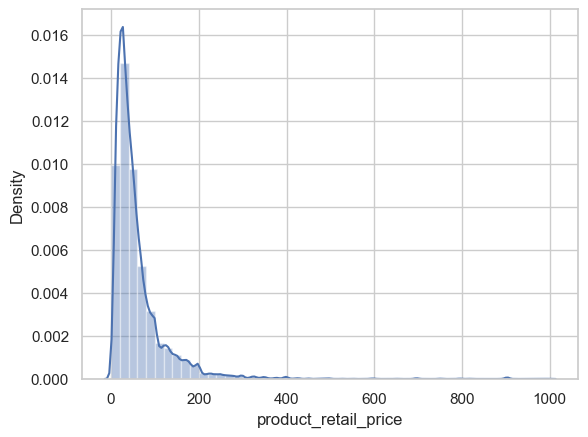

In [174]:
sns.distplot(merged_df2['product_retail_price'])
plt.show()

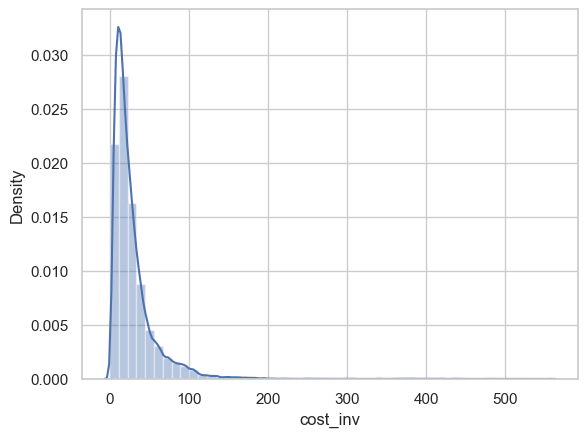

In [175]:
sns.distplot(merged_df2['cost_inv'])
plt.show()

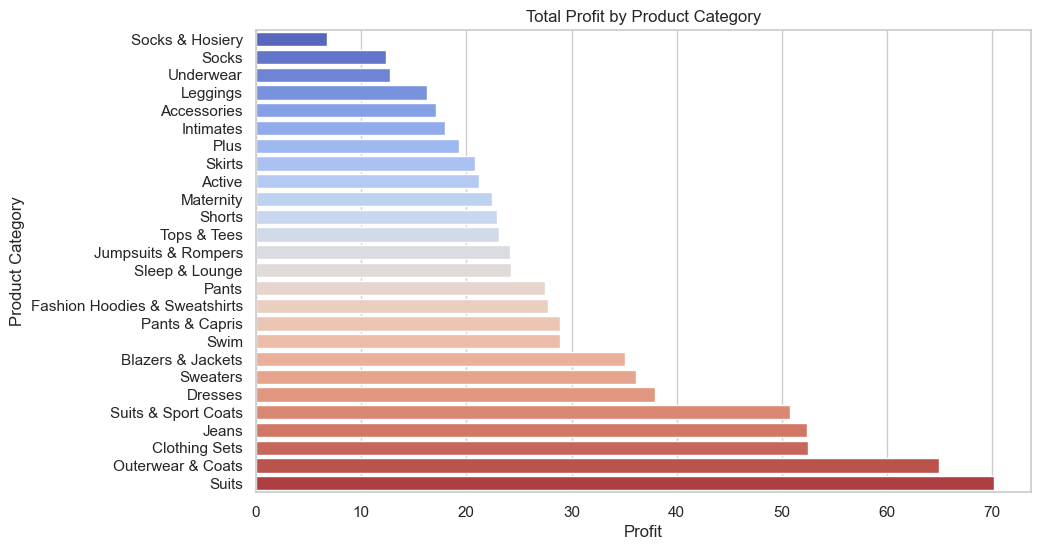

In [134]:
average_product_retail_price = product.groupby('category')['cost'].mean().reset_index().sort_values(by = 'cost')
plt.figure(figsize=(10, 6))
sns.barplot(y='category', x='cost', data=average_product_retail_price, palette='coolwarm')
plt.title('Total Profit by Product Category')
plt.xlabel('Profit')
plt.ylabel('Product Category')
plt.show()

## Volume of product in inventory by category

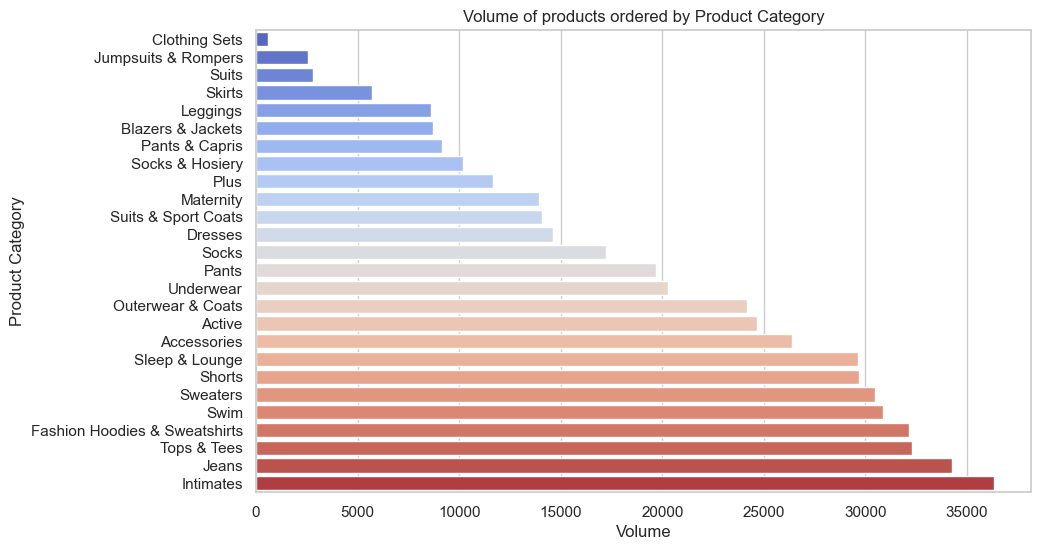

In [135]:
average_product_retail_price = merged_df2.groupby('product_category')['product_retail_price'].count().reset_index().sort_values(by = 'product_retail_price')
plt.figure(figsize=(10, 6))
sns.barplot(y='product_category', x='product_retail_price', data=average_product_retail_price, palette='coolwarm')
plt.title('Volume of products ordered by Product Category')
plt.xlabel('Volume')
plt.ylabel('Product Category')
plt.show()

## Highest volume of products in inventory are from intimate,jeans,tops and tees category

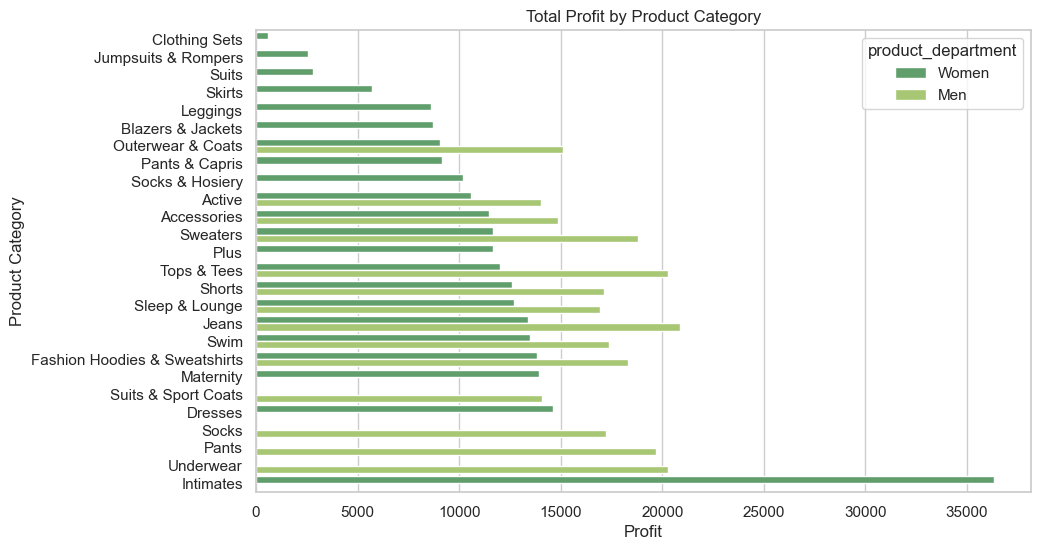

In [136]:
average_product_retail_price = merged_df2.groupby(['product_category','product_department'])['product_retail_price'].count().reset_index().sort_values(by = 'product_retail_price')
plt.figure(figsize=(10, 6))
sns.barplot(y='product_category', x='product_retail_price',hue = 'product_department', data=average_product_retail_price, palette='summer')
plt.title('Total Profit by Product Category')
plt.xlabel('Profit')
plt.ylabel('Product Category')
plt.show()

## Category - intimate has very high proportion of female customers

# User Demographics Analysis:Use users.csv to analyse user demographics, such as age, gender, and location.


In [137]:
users = pd.read_csv('./data/users.csv')
users.head()

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
0,457,Timothy,Bush,timothybush@example.net,65,M,Acre,87620 Johnson Hills,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2022-07-19 13:51:00+00:00
1,6578,Elizabeth,Martinez,elizabethmartinez@example.com,34,F,Acre,1705 Nielsen Land,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2023-11-08 18:49:00+00:00
2,36280,Christopher,Mendoza,christophermendoza@example.net,13,M,Acre,125 Turner Isle Apt. 264,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Email,2019-08-24 06:10:00+00:00
3,60193,Jimmy,Conner,jimmyconner@example.com,64,M,Acre,0966 Jose Branch Apt. 008,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2020-02-15 11:26:00+00:00
4,64231,Natasha,Wilson,natashawilson@example.net,25,F,Acre,20798 Phillip Trail Apt. 392,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2020-03-13 06:45:00+00:00


In [138]:
users.shape

(100000, 15)

In [139]:
users.isnull().sum()

id                  0
first_name          0
last_name           0
email               0
age                 0
gender              0
state               0
street_address      0
postal_code         0
city              958
country             0
latitude            0
longitude           0
traffic_source      0
created_at          0
dtype: int64

In [140]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              100000 non-null  int64  
 1   first_name      100000 non-null  object 
 2   last_name       100000 non-null  object 
 3   email           100000 non-null  object 
 4   age             100000 non-null  int64  
 5   gender          100000 non-null  object 
 6   state           100000 non-null  object 
 7   street_address  100000 non-null  object 
 8   postal_code     100000 non-null  object 
 9   city            99042 non-null   object 
 10  country         100000 non-null  object 
 11  latitude        100000 non-null  float64
 12  longitude       100000 non-null  float64
 13  traffic_source  100000 non-null  object 
 14  created_at      100000 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 11.4+ MB


In [141]:
# imputing the null values with the mode
mode_city = users['city'].mode()[0]
users['city'].fillna(mode_city, inplace=True)

### Distrubution of users based on gender

In [142]:
users.head(1)

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
0,457,Timothy,Bush,timothybush@example.net,65,M,Acre,87620 Johnson Hills,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2022-07-19 13:51:00+00:00


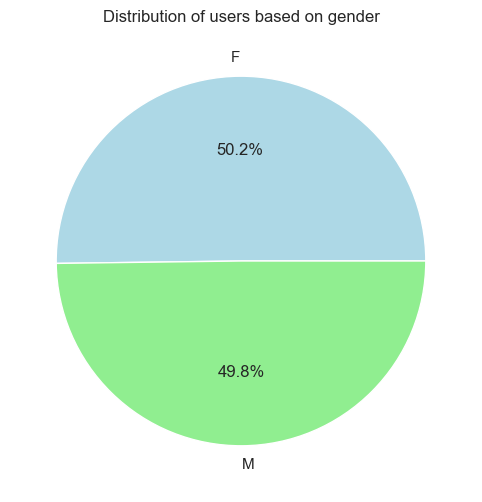

In [143]:
plt.figure(figsize=(10, 6))
users['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Distribution of users based on gender')
plt.ylabel('')  # Remove y-label
plt.show()

In [144]:
users.state.nunique()

229

In [145]:
users.country.nunique()

16

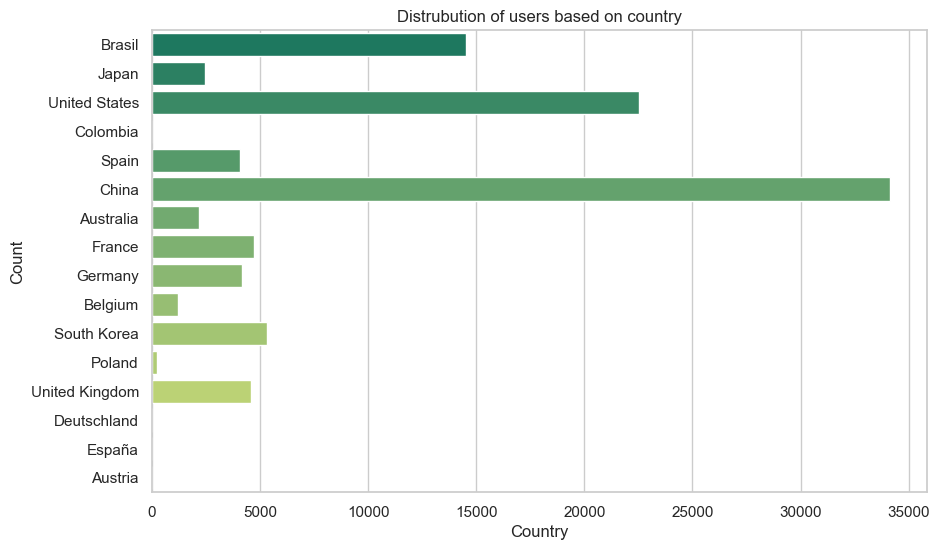

In [146]:
plt.figure(figsize=(10, 6))
sns.countplot(y='country', data=users, palette='summer')
plt.title('Distrubution of users based on country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

## Inference : Highest number of users are from china

##  Average age of users in each country

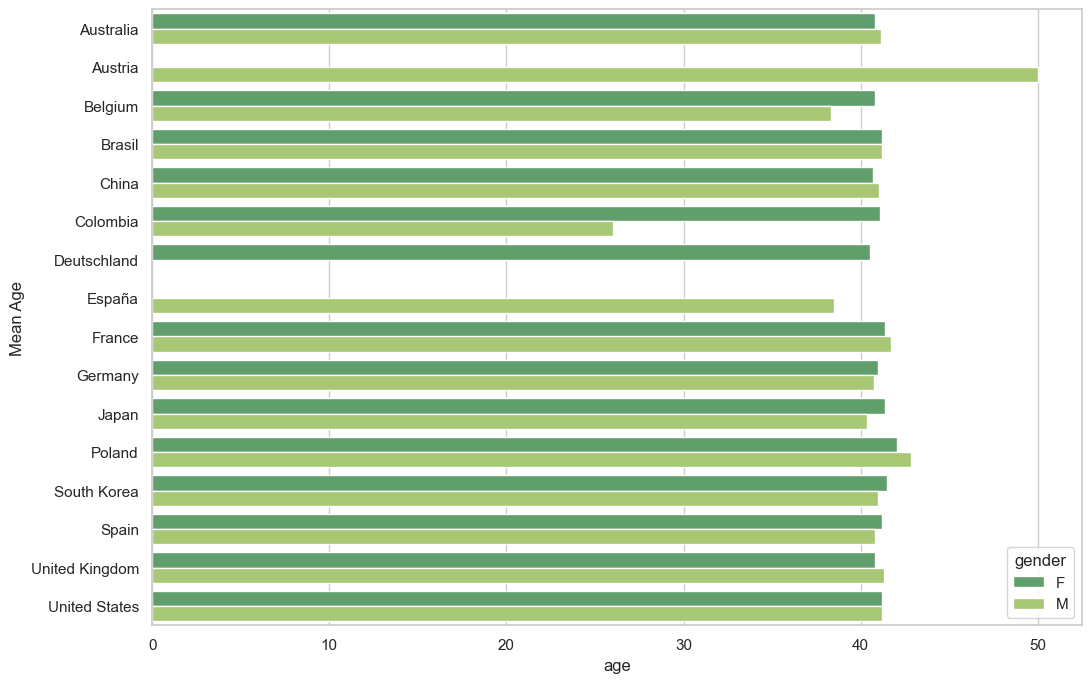

In [147]:
plt.figure(figsize=(12, 8))
user_country_gender = users.groupby(['country','gender'])['age'].mean()
user_country_gender = pd.DataFrame(user_country_gender)
sns.barplot(data=user_country_gender, y='country', x='age', hue='gender', palette='summer')
plt.ylabel('Mean Age')
plt.show()

## Distribution of gender in each country

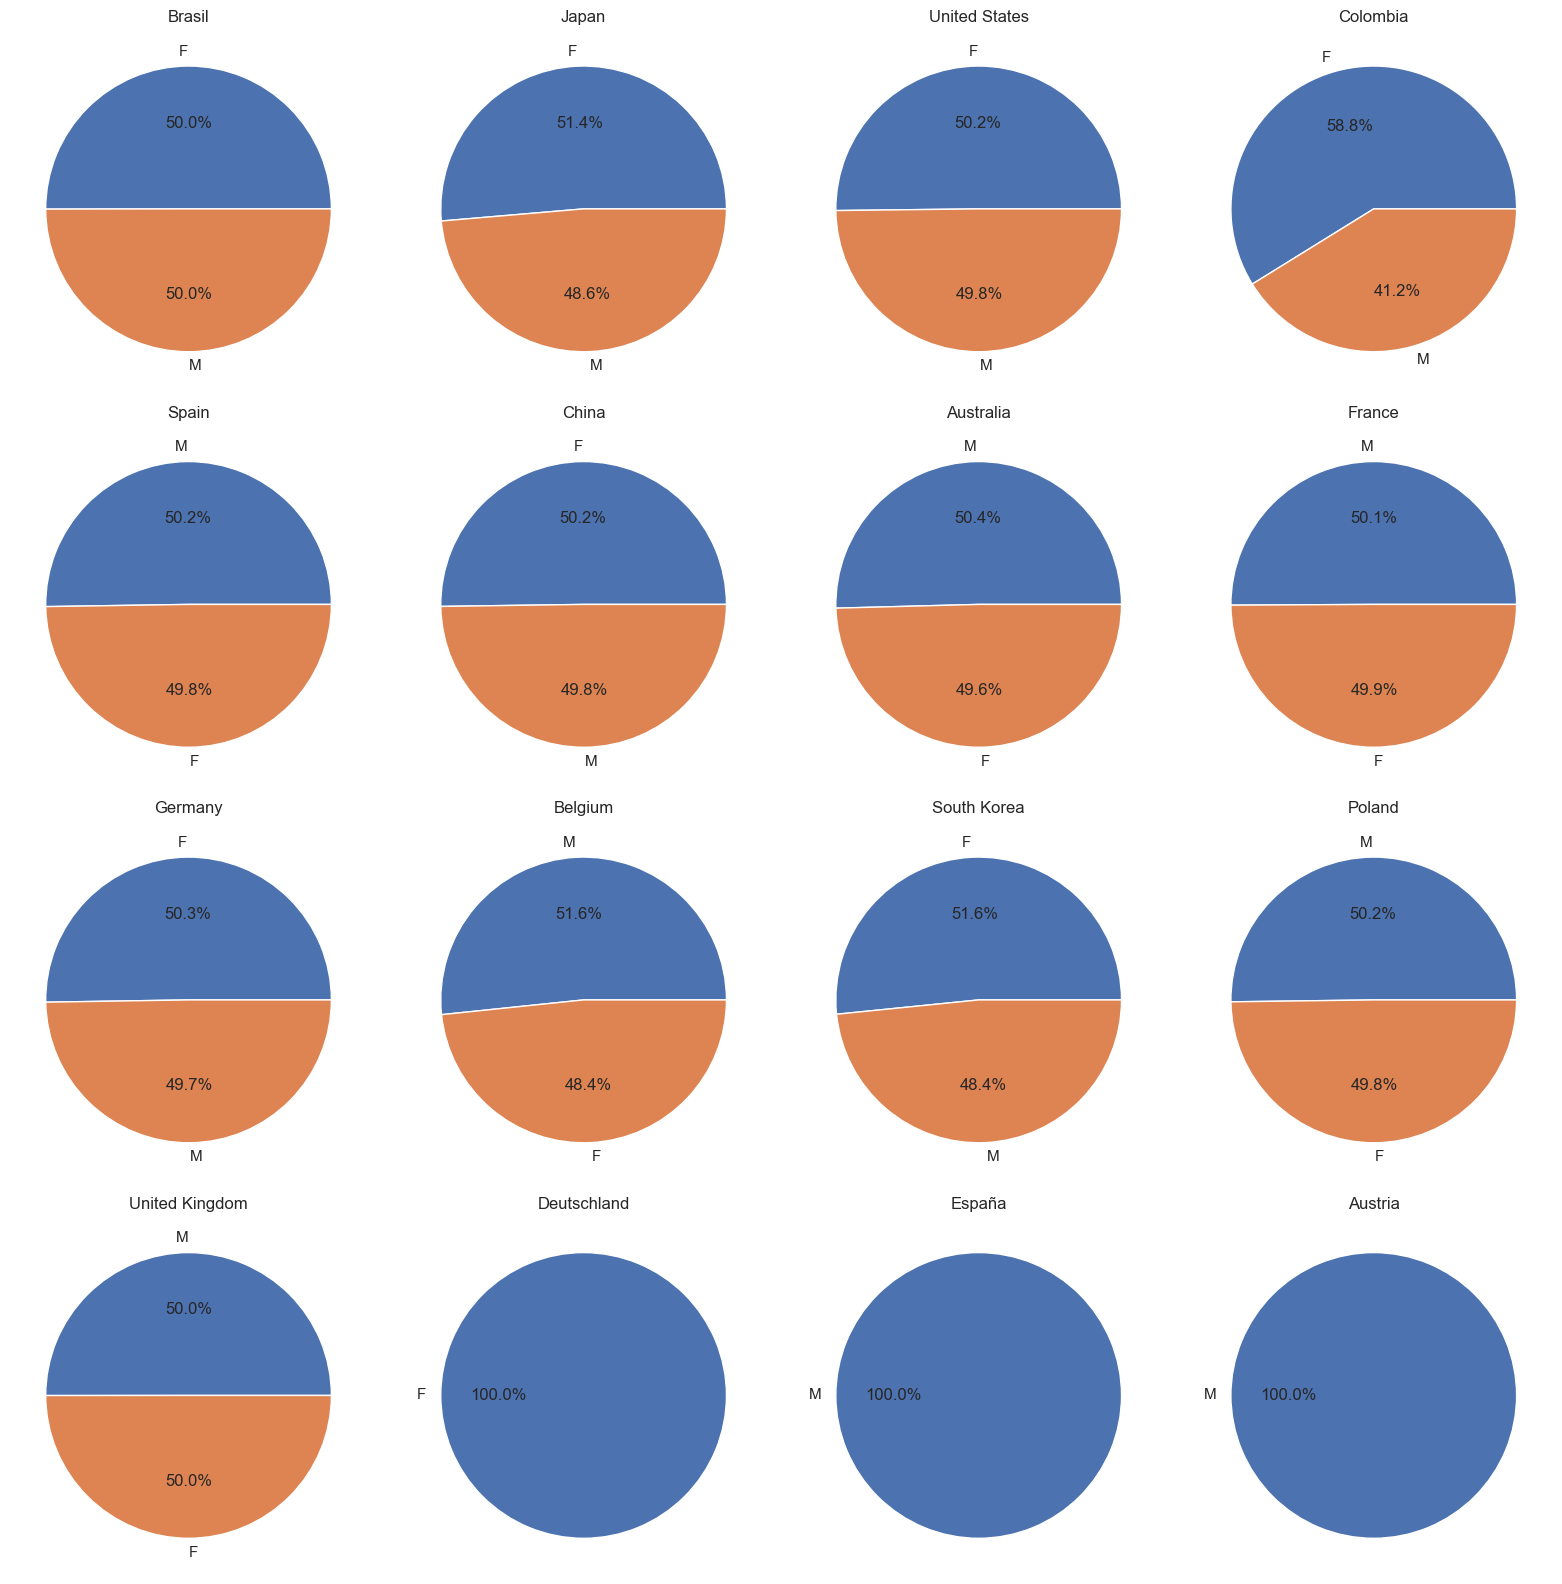

In [148]:
fig, axs = plt.subplots(4, 4, figsize=(16, 16))
countries = users['country'].unique()

# Iterate over each country and create a pie chart for gender distribution
for i, country in enumerate(countries):
    ax = axs[i // 4, i % 4]
    country_data = users[users['country'] == country]
    ax.pie(country_data['gender'].value_counts(), labels=country_data['gender'].value_counts().index, autopct='%1.1f%%')
    ax.set_title(country)

plt.tight_layout()
plt.show()

## In Majority of country male-female ration is balanced

## Map for easier data visualization of 'users' dataset

In [149]:
mean_age_map = users.groupby('country')['age'].mean()
mean_age_map = pd.DataFrame(mean_age_map).reset_index()

In [150]:
mean_age_map['latitude'] = np.array([-25.2744, 47.5162, 50.8503, -14.235, 35.8617, 4.5709, 51.1657, 40.4637, 46.6034, 51.1657, 36.2048, 51.9194, 35.9078, 40.4637, 55.3781, 37.7749])
mean_age_map['longitude'] = np.array([133.7751, 14.5501, 4.3517, -51.9253, 104.1954, -74.2973, 10.4515, -3.7492, 1.4437, 10.4515, 138.2529, 19.1451, 127.7669, -3.7492, -3.4360, -122.4194])

In [151]:
import folium

# Create a map centered at a certain location
m = folium.Map(zoom_start=3)  # Centered at the United States

# Add markers for each distribution center
for index, row in mean_age_map.iterrows():
    folium.Marker(
    location=[row['latitude'],row['longitude']],
    tooltip=str(row['country'])+ "Mean age : " + str(row['age']),
    popup=row['age'],
    icon=folium.Icon(color="green"),
).add_to(m)

temp = users.sample(300,replace = False)
for index, row in temp.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], popup=row['first_name']).add_to(m)

# Save the map as an HTML file
# m.save("distribution_centers_map.html")
m

In [152]:
count_traffic = users.groupby('country')['traffic_source'].count()
count_traffic = pd.DataFrame(count_traffic).reset_index()
count_traffic[['latitude','longitude']] = mean_age_map[['latitude','longitude']]

In [153]:
m = folium.Map(zoom_start=3)  # Centered at the United States

for index, row in count_traffic.iterrows():
    folium.Marker(
    location=[row['latitude'],row['longitude']],
    tooltip=str(row['country'])+ "Traffic Count : " + str(row['traffic_source']),
#     popup=row['age'],
    icon=folium.Icon(color="green"),
).add_to(m)
m

## Traffic Source in each country (Bar Graph)

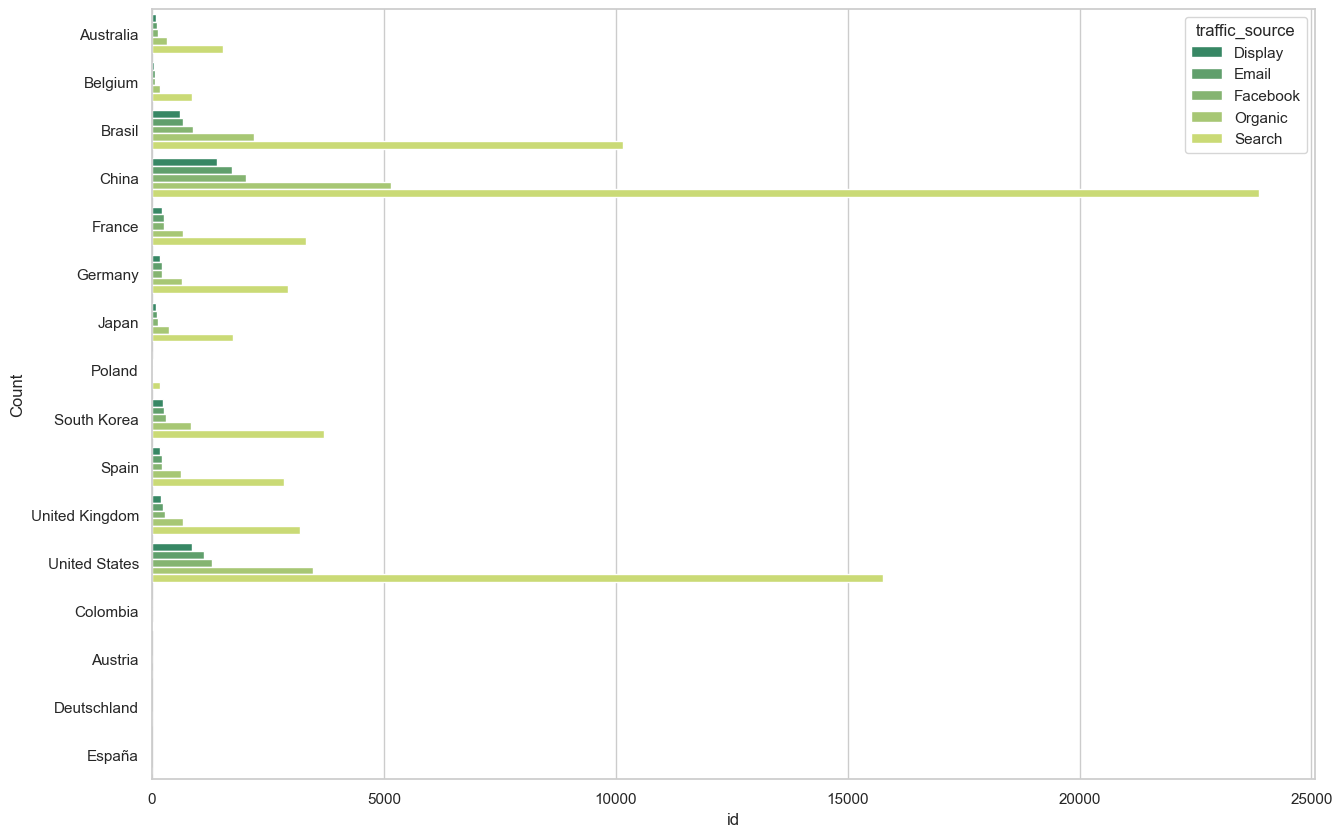

In [154]:
plt.figure(figsize=(15,10))
user_traffic_gender = users.groupby(['traffic_source','country'])['id'].count()
user_traffic_gender = pd.DataFrame(user_traffic_gender)
sns.barplot(data=user_traffic_gender, y='country', x='id', hue='traffic_source', palette='summer')
plt.ylabel('Count')
plt.show()

#### Pie Chart

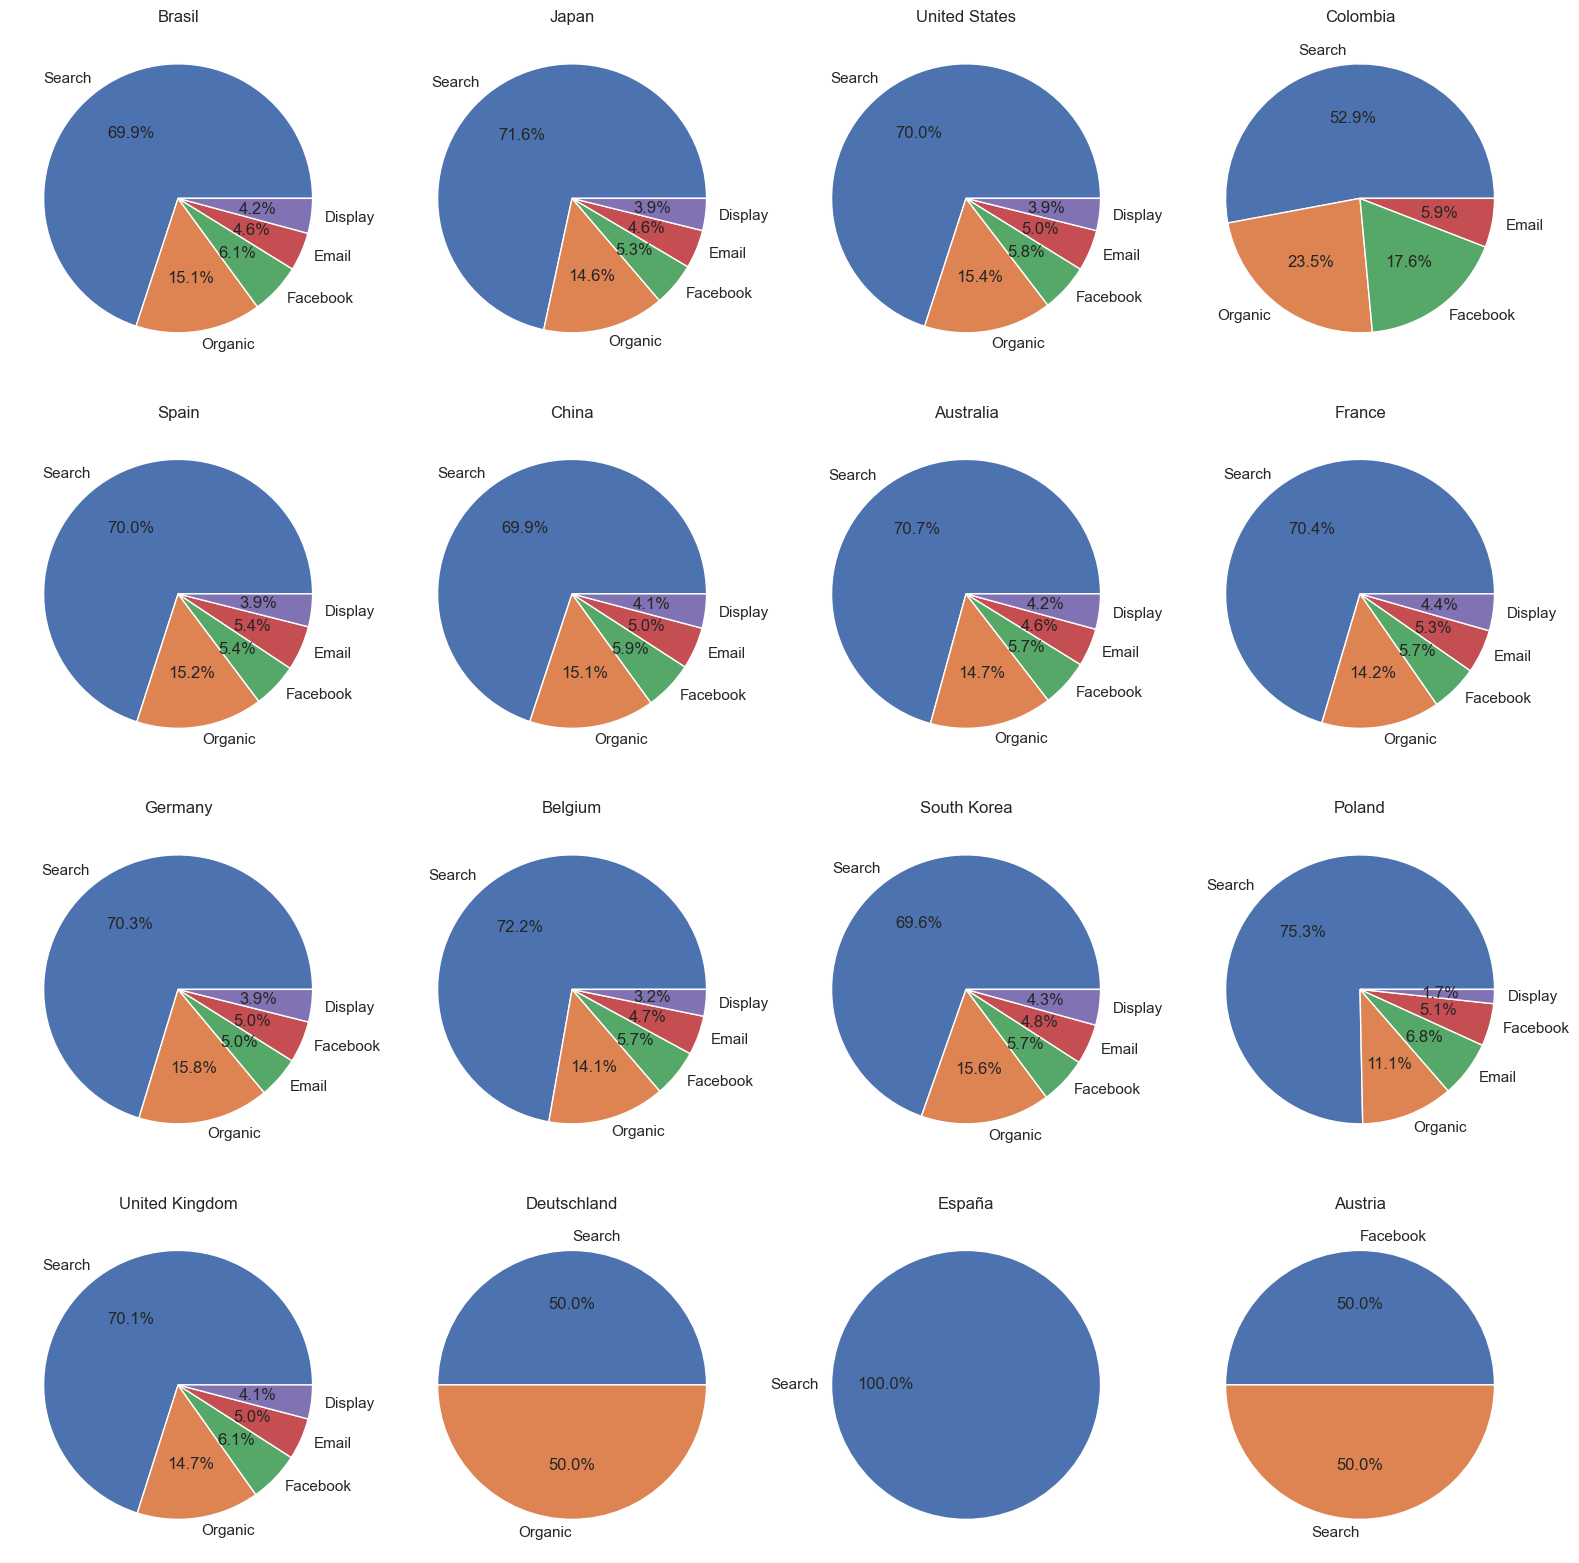

In [155]:
fig, axs = plt.subplots(4, 4, figsize=(16, 16))
countries = users['country'].unique()

# Iterate over each country and create a pie chart for gender distribution
for i, country in enumerate(countries):
    ax = axs[i // 4, i % 4]
    country_data = users[users['country'] == country]
    ax.pie(country_data['traffic_source'].value_counts(), labels=country_data['traffic_source'].value_counts().index, autopct='%1.1f%%')
    ax.set_title(country)

plt.tight_layout()
plt.show()

## In all country main contributor to traffic_source is 'search'

# Order Fulfilment Analysis: Analyse order_items.csv and orders.csv to understand order fulfilment timelines and status.

In [156]:
order_items = pd.read_csv('./data/order_items.csv')
orders = pd.read_csv('./data/orders.csv')


In [157]:
print(order_items.shape)
print(orders.shape)

(181759, 11)
(125226, 9)


In [158]:
orders.head()

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,8,5,Cancelled,F,2022-10-20 10:03:00+00:00,NaN,NaN,NaN,3
1,60,44,Cancelled,F,2023-01-20 02:12:00+00:00,NaN,NaN,NaN,1
2,64,46,Cancelled,F,2021-12-06 09:11:00+00:00,NaN,NaN,NaN,1
3,89,65,Cancelled,F,2020-08-13 09:58:00+00:00,NaN,NaN,NaN,1
4,102,76,Cancelled,F,2023-01-17 08:17:00+00:00,NaN,NaN,NaN,2


In [159]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125226 entries, 0 to 125225
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   order_id      125226 non-null  int64 
 1   user_id       125226 non-null  int64 
 2   status        125226 non-null  object
 3   gender        125226 non-null  object
 4   created_at    125226 non-null  object
 5   returned_at   12530 non-null   object
 6   shipped_at    81461 non-null   object
 7   delivered_at  43884 non-null   object
 8   num_of_item   125226 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 8.6+ MB


In [160]:
orders.isnull().sum() * 100 / len(orders)

order_id         0.000000
user_id          0.000000
status           0.000000
gender           0.000000
created_at       0.000000
returned_at     89.994091
shipped_at      34.948813
delivered_at    64.956159
num_of_item      0.000000
dtype: float64

In [161]:
orders.drop(['returned_at','shipped_at','delivered_at'],axis = 1,inplace = True)

## Analysing the order_items data - already done in the first part

## Analysing orders data

In [162]:
orders['status'].value_counts(normalize = True)

Shipped       0.300073
Complete      0.250379
Processing    0.200885
Cancelled     0.148603
Returned      0.100059
Name: status, dtype: float64

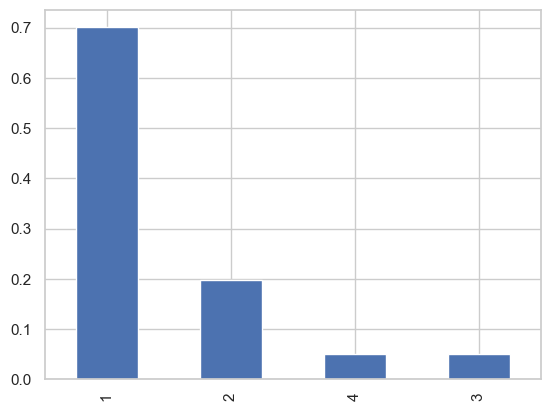

In [163]:
orders['num_of_item'].value_counts(normalize = True).plot(kind = 'bar')
plt.show()

### Most of the order has only 1 item (70%)

In [164]:
orders_merged_df = pd.merge(order_items, orders, on=['order_id', 'user_id'], how='inner')

In [165]:
orders_merged_df.head(3)

,id,order_id,user_id,product_id,inventory_item_id,status_x,created_at_x,shipped_at,delivered_at,returned_at,sale_price,status_y,gender,created_at_y,num_of_item
0,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaN,NaN,NaN,0.02,Cancelled,F,2023-05-07 07:33:00+00:00,1
1,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21+00:00,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,NaN,0.02,Complete,F,2023-03-14 03:59:00+00:00,1
2,51224,35223,28215,14235,138236,Complete,2023-12-05 13:25:30+00:00,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,NaN,0.02,Complete,F,2023-12-03 13:23:00+00:00,4


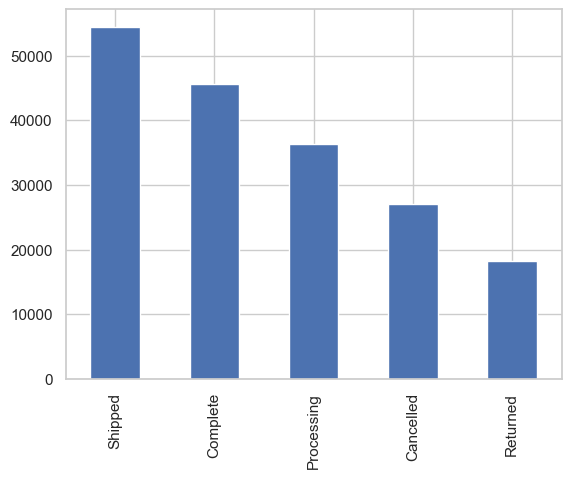

In [166]:
orders_merged_df['status_x'].value_counts().plot(kind = 'bar')
plt.show()

In [176]:
orders_merged_df['status_x'].value_counts(normalize = True)

Shipped       0.299517
Complete      0.250931
Processing    0.200199
Cancelled     0.149044
Returned      0.100309
Name: status_x, dtype: float64

### Inference : 55% of order are wither shipped or completed 10% of orders are returned and 14% returned

In [167]:
orders_merged_df['sale_price'].describe()

count    181759.000000
mean         59.568544
std          66.657262
min           0.020000
25%          24.500000
50%          39.990002
75%          69.949997
max         999.000000
Name: sale_price, dtype: float64

In [168]:
orders_merged_df['gender'].value_counts()

F    91009
M    90750
Name: gender, dtype: int64

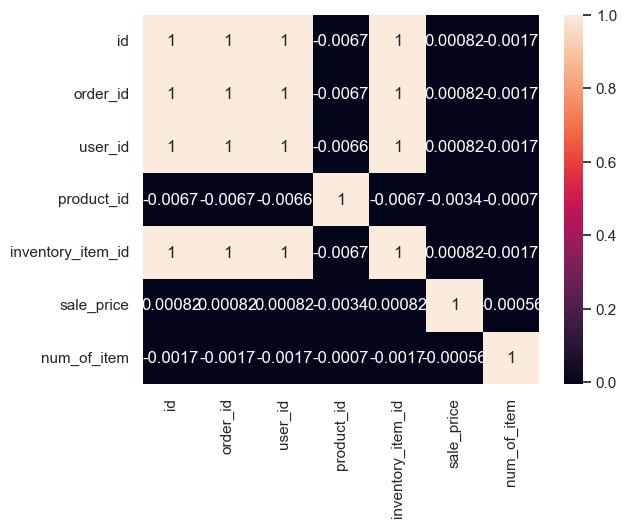

In [169]:
sns.heatmap(orders_merged_df.corr(),annot = True)
plt.show()

In [170]:
timestamp_columns = ['created_at_x', 'shipped_at', 'delivered_at', 'returned_at', 'created_at_y']
orders_merged_df[timestamp_columns] = orders_merged_df[timestamp_columns].apply(pd.to_datetime)

orders_merged_df['shipping_duration'] = orders_merged_df['shipped_at'] - orders_merged_df['created_at_x']
orders_merged_df['delivery_duration'] = orders_merged_df['delivered_at'] - orders_merged_df['shipped_at']

# Calculate return duration if needed
orders_merged_df['return_duration'] = orders_merged_df['returned_at'] - orders_merged_df['delivered_at']

# Print mean shipping, delivery, and return durations
print("Mean Shipping Duration:", orders_merged_df['shipping_duration'].mean())
print("Mean Delivery Duration:", orders_merged_df['delivery_duration'].mean())
print("Mean Return Duration:", orders_merged_df['return_duration'].mean())


Mean Shipping Duration: 0 days 12:56:24.119207649
Mean Delivery Duration: 2 days 12:17:41.406306292
Mean Return Duration: 1 days 12:01:12.327775340


#### Mean Shipping Duration: 0 days 12:56:24.119207649
#### Mean Delivery Duration: 2 days 12:17:41.406306292
#### Mean Return Duration: 1 days 12:01:12.327775340

In [226]:
orders_merged_df_product = pd.merge(orders_merged_df, product, left_on=['product_id'],right_on=['id'], how='inner')

frequent_products = orders_merged_df_product['product_id'].value_counts().reset_index().rename(columns = {'index':'id','product_id':'count'}).sort_values(by = 'count',ascending = False)['id'].tolist()
freq = []
n = 10
i = 0
while (n>0):
    if frequent_products[i] not in freq:
        freq.append(frequent_products[i])
        n -= 1
    i += 1

In [229]:
# freq

In [228]:
product[product['id'].isin(freq)][['name','category']]

,name,category
6946,Michael Kors Men's 3 Pack Brief,Underwear
16309,Mens Print Hot Body Boxer Swimsuit Gary Majdel...,Swim
16883,Haggar Men's Tonal Stria Pleat Front Cuff Dres...,Pants
17053,Thorlo Men's Lt Walking Mini Crew Sock,Socks
17968,Joe's Jeans Men's Rebel Relaxed Fit Jean,Jeans
20031,Wrangler Rugged Wear Men's Unlined Denim Jacke...,Outerwear & Coats
20380,Knothe - Mens Waffle Weave Robe Tan 29649,Sleep & Lounge
23531,Bayside Apparel Adult USA-Made Long-Sleeve Poc...,Tops & Tees
23811,Elegant Men's Two button Three piece Strip Suit,Suits & Sport Coats
26969,Life is Good Men's King Of The Grill Short Sle...,Active


## These are top products

In [173]:
## Ajay Krishnan